In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pandas as pd

In [2]:
adata = sc.read_h5ad("adata-epi-tumor.h5ad")
adata

AnnData object with n_obs × n_vars = 27828 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'treat', 'leiden-1', 'annotation', 'cnv_leiden', 'cnv_score', 'cnv_status', 'leiden-epi-tumor', 'tumor-type', 'IHC'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'annotation_colors', 'batch_colors', 'cnv', 'cnv_leiden_colors', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'dendrogram_leiden-1', 'dendrogram_leiden-epi-tumor', 'gender_colors'

In [3]:
def propPlot(age_df, barlabels1, barlabels2, ax, colors=sc.pl.palettes.default_20, xlabel='Sample ID', show_y=True, xrotate=90):
    all_df = age_df.sum(axis=1)
    age_normdf = pd.DataFrame([age_df.loc[i,:]/all_df[i] for i in barlabels1], index=barlabels1)
    age_cumdf = pd.DataFrame([np.cumsum(age_normdf.loc[i,:]) for i in barlabels1], index=barlabels1)
    norm_gdfs = age_normdf
    cum_gdfs = age_cumdf
    for i, col in enumerate(age_df.columns):
        height = norm_gdfs[col]
        starts = cum_gdfs[col] - height
        rects = ax.bar(barlabels2, height, bottom=starts, width=0.9, color=colors[i], edgecolor='white', linewidth=0.5,
                        label=col, alpha=1)
    
        # ax.bar_label(rects,age_df.loc[:, col], label_type='center', color='lightgrey', fontsize=14)
    ax.legend( bbox_to_anchor=(1, -0.3), 
              handletextpad=0.5, frameon=False,
                          borderpad=0.4,
                          columnspacing=1,
                          handlelength=0.65,
              loc='lower left', fontsize=14)
    if show_y:
        ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1,decimals=0))
        ax.set_ylabel('Cell proportions')
    else:
        ax.yaxis.set_visible(False)
        ax.spines.left.set_visible(False)
    ax.set_xlabel(xlabel)
    ax.set_xticks(barlabels2)
    ax.set_xticklabels(labels=barlabels2,rotation=xrotate,fontsize=13)
    ax.spines.top.set_visible(False)
    ax.spines.right.set_visible(False)
 # 关闭背景网格线
    ax.grid(False)  

#### 细胞周期打分

In [4]:
s_genes = [
    'MCM5', 'PCNA', 'TYMS', 'FEN1', 'MCM2', 'MCM4',
    'RRM1', 'UNG', 'GINS2', 'MCM6', 'CDCA7', 'DTL',
    'PRIM1', 'UHRF1', 'HELLS', 'RFC2', 'RPA2',
    'NASP', 'RAD51AP1', 'GMNN', 'WDR76', 'SLBP',
    'CCNE2', 'UBR7', 'POLD3', 'MSH2', 'ATAD2',
    'RAD51', 'RRM2', 'CDC45', 'CDC6', 'EXO1',
    'TIPIN', 'DSCC1', 'BLM', 'CASP8AP2', 'USP1',
    'CLSPN', 'POLA1', 'CHAF1B', 'BRIP1', 'E2F8'
]


In [5]:
g2m_genes = [
    'HMGB2', 'CDK1', 'NUSAP1', 'UBE2C', 'BIRC5',
    'TPX2', 'TOP2A', 'NDC80', 'CKS2', 'NUF2',
    'CKS1B', 'MKI67', 'TMPO', 'CENPF', 'TACC3',
    'FAM64A', 'SMC4', 'CCNB2', 'CKAP2L', 'CKAP2',
    'AURKB', 'BUB1', 'KIF11', 'ANP32E', 'TUBB4B',
    'GTSE1', 'KIF20B', 'HJURP', 'CDC20', 'TTK',
    'CDC25C', 'KIF2C', 'RANGAP1', 'NCAPD2',
    'DLGAP5', 'CDCA3', 'HN1', 'CDC20B', 'SPC25',
    'UBE2T', 'KIF18B', 'CBX5', 'CENPE', 'CTCF',
    'NEK2', 'G2E3', 'GAS2L3', 'PSRC1'
]


In [6]:
# 细胞周期矫正
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes)

In [7]:
adata.obs[['S_score', 'G2M_score', 'phase']]

,S_score,G2M_score,phase
barcodes,,,
AAACCCAAGACCAAGC-1-1T,-0.046603,-0.010798,G1
AAACCCATCACTTTGT-1-1T,-0.031263,0.002206,G2M
AAACGAAAGCGGATCA-1-1T,-0.052232,-0.027831,G1
AAACGAACACAGTGTT-1-1T,-0.019368,0.016636,G2M
AAACGCTCAAGCAATA-1-1T,-0.055258,-0.056211,G1
...,...,...,...
TTTGGTTGTCCCTACT-1-22T,-0.080077,-0.003989,G1
TTTGGTTGTGATGATA-1-22T,0.033612,-0.060007,S
TTTGTCAAGGCAAAGA-1-22T,0.002335,-0.012527,S


/tmp/ipykernel_290519/3624080946.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['batch', 'phase']).size().unstack(fill_value=0)


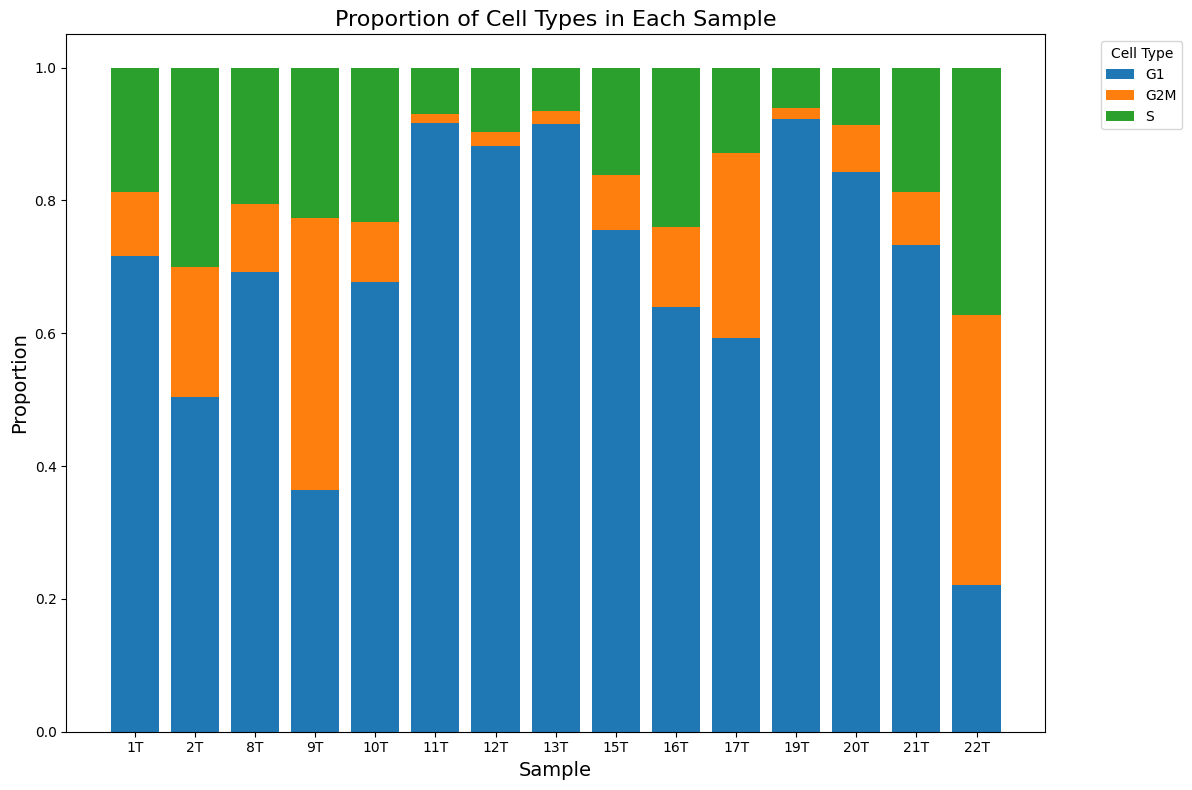

In [13]:
# 1. 计算每个样本中每种细胞类型的数量
cell_type_counts = adata.obs.groupby(['batch', 'phase']).size().unstack(fill_value=0)

# 2. 计算每个样本的总细胞数Luminal B
sample_totals = cell_type_counts.sum(axis=1)

# 3. 计算每种细胞类型在每个样本中的占比
proportions = cell_type_counts.div(sample_totals, axis=0)

# 4. 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(12, 8))

# 遍历每个细胞类型，逐层堆叠
bottom = np.zeros(len(cell_type_counts.index))  # 初始化底部高度
for cell_type in proportions.columns:
    ax.bar(proportions.index, proportions[cell_type], bottom=bottom, label=cell_type)
    bottom += proportions[cell_type]  # 更新底部高度

# 添加标题和标签
ax.set_title('Proportion of Cell Types in Each Sample', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

In [8]:
MORANDI_COLORS = {
    # 免疫细胞组 - 蓝紫系
    "Cycle": {
        "members": ["G1", "G2M", "S"],
        "colors": ["#1f77b4", "#9467bd", "#2ca02c"]  # 蓝、紫、绿
    }
}

# 生成颜色映射表
colors = {}
for group, info in MORANDI_COLORS.items():
    for i, cell_type in enumerate(info["members"]):
        colors[cell_type] = info["colors"][i % len(info["colors"])]

# 转换为 pandas Series
import pandas as pd
colors = pd.Series(colors)

/tmp/ipykernel_229471/2272368379.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rects = ax.bar(barlabels2, height, bottom=starts, width=0.9, color=colors[i], edgecolor='white', linewidth=0.5,
/tmp/ipykernel_229471/2272368379.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  rects = ax.bar(barlabels2, height, bottom=starts, width=0.9, color=colors[i], edgecolor='white', linewidth=0.5,
/tmp/ipykernel_229471/2272368379.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

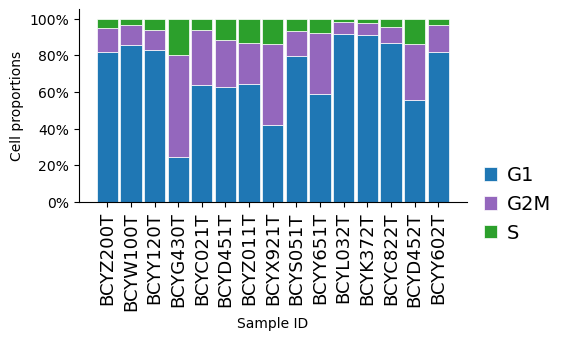

In [9]:
barlabels1 = ['10T','20T', '21T', '22T','1T', '2T', '8T', '9T', '15T','17T', '11T', '12T', '13T', '16T', '19T']
barlabels2 = ['BCYZ200T','BCYW100T', 'BCYY120T', 'BCYG430T','BCYC021T', 'BCYD451T', 'BCYZ011T', 'BCYX921T', 'BCYS051T','BCYY651T', 'BCYL032T', 'BCYK372T', 'BCYC822T', 'BCYD452T', 'BCYY602T']
cell_types = ['G1', 'G2M', 'S']
age_df = pd.DataFrame(columns = list(cell_types))
for bar in barlabels1:
    d1 = pd.DataFrame([len(adata[(adata.obs["phase"] == ct) & (adata.obs["batch"] == bar)]) for ct in list(cell_types)], index = list(cell_types), columns=[bar]).T
    age_df = pd.concat([age_df, d1])
fig0, ax0 = plt.subplots(figsize=(5, 2.5))
propPlot(age_df, barlabels1, barlabels2, ax0, colors=colors)
fig0.savefig(f"figures/phase-proportions.svg",bbox_inches='tight')

#### 炎症评分

In [52]:
# 炎症相关基因
inflammatory_genes = [
    'IL1B', 'IL6', 'IL8', 'TNF', 'CCL2', 'CCL3', 'CCL4',
    'CXCL1', 'CXCL2', 'CXCL9', 'CXCL10',
    'NFKB1', 'NFKBIA', 'RELA', 'STAT1', 'IRF1',
    'CD68', 'CD163', 'CD3D', 'CD8A', 'PDCD1', 'CD274',
    'TGFB1', 'IL10', 'FOS', 'JUN', 'SOCS3', 'ATF3'
]


In [53]:
sc.tl.score_genes(adata, gene_list = inflammation_genes, score_name='inflammation_score')

computing score 'inflammation_score'
    finished: added
    'inflammation_score', score of gene set (adata.obs).
    200 total control genes are used. (0:00:00)


In [54]:
adata.obs['inflammation_score']

barcodes
AAACCCAAGACCAAGC-1-1T    -0.133845
AAACCCATCACTTTGT-1-1T    -0.072088
AAACGAAAGCGGATCA-1-1T    -0.129720
AAACGAACACAGTGTT-1-1T    -0.071999
AAACGCTCAAGCAATA-1-1T    -0.202193
                            ...   
TTTGGTTGTCCCTACT-1-22T   -0.231495
TTTGGTTGTGATGATA-1-22T    0.444532
TTTGTCAAGGCAAAGA-1-22T    1.501191
TTTGTCAGTCATCCCT-1-22T   -0.262988
TTTGTCATCAATCACG-1-22T    0.935591
Name: inflammation_score, Length: 27828, dtype: float64

In [82]:
adata.obs['inflammation_status'] = np.where(
    adata.obs['inflammation_score'] > 0, 'inflammation_high', 'inflammation_low'
)

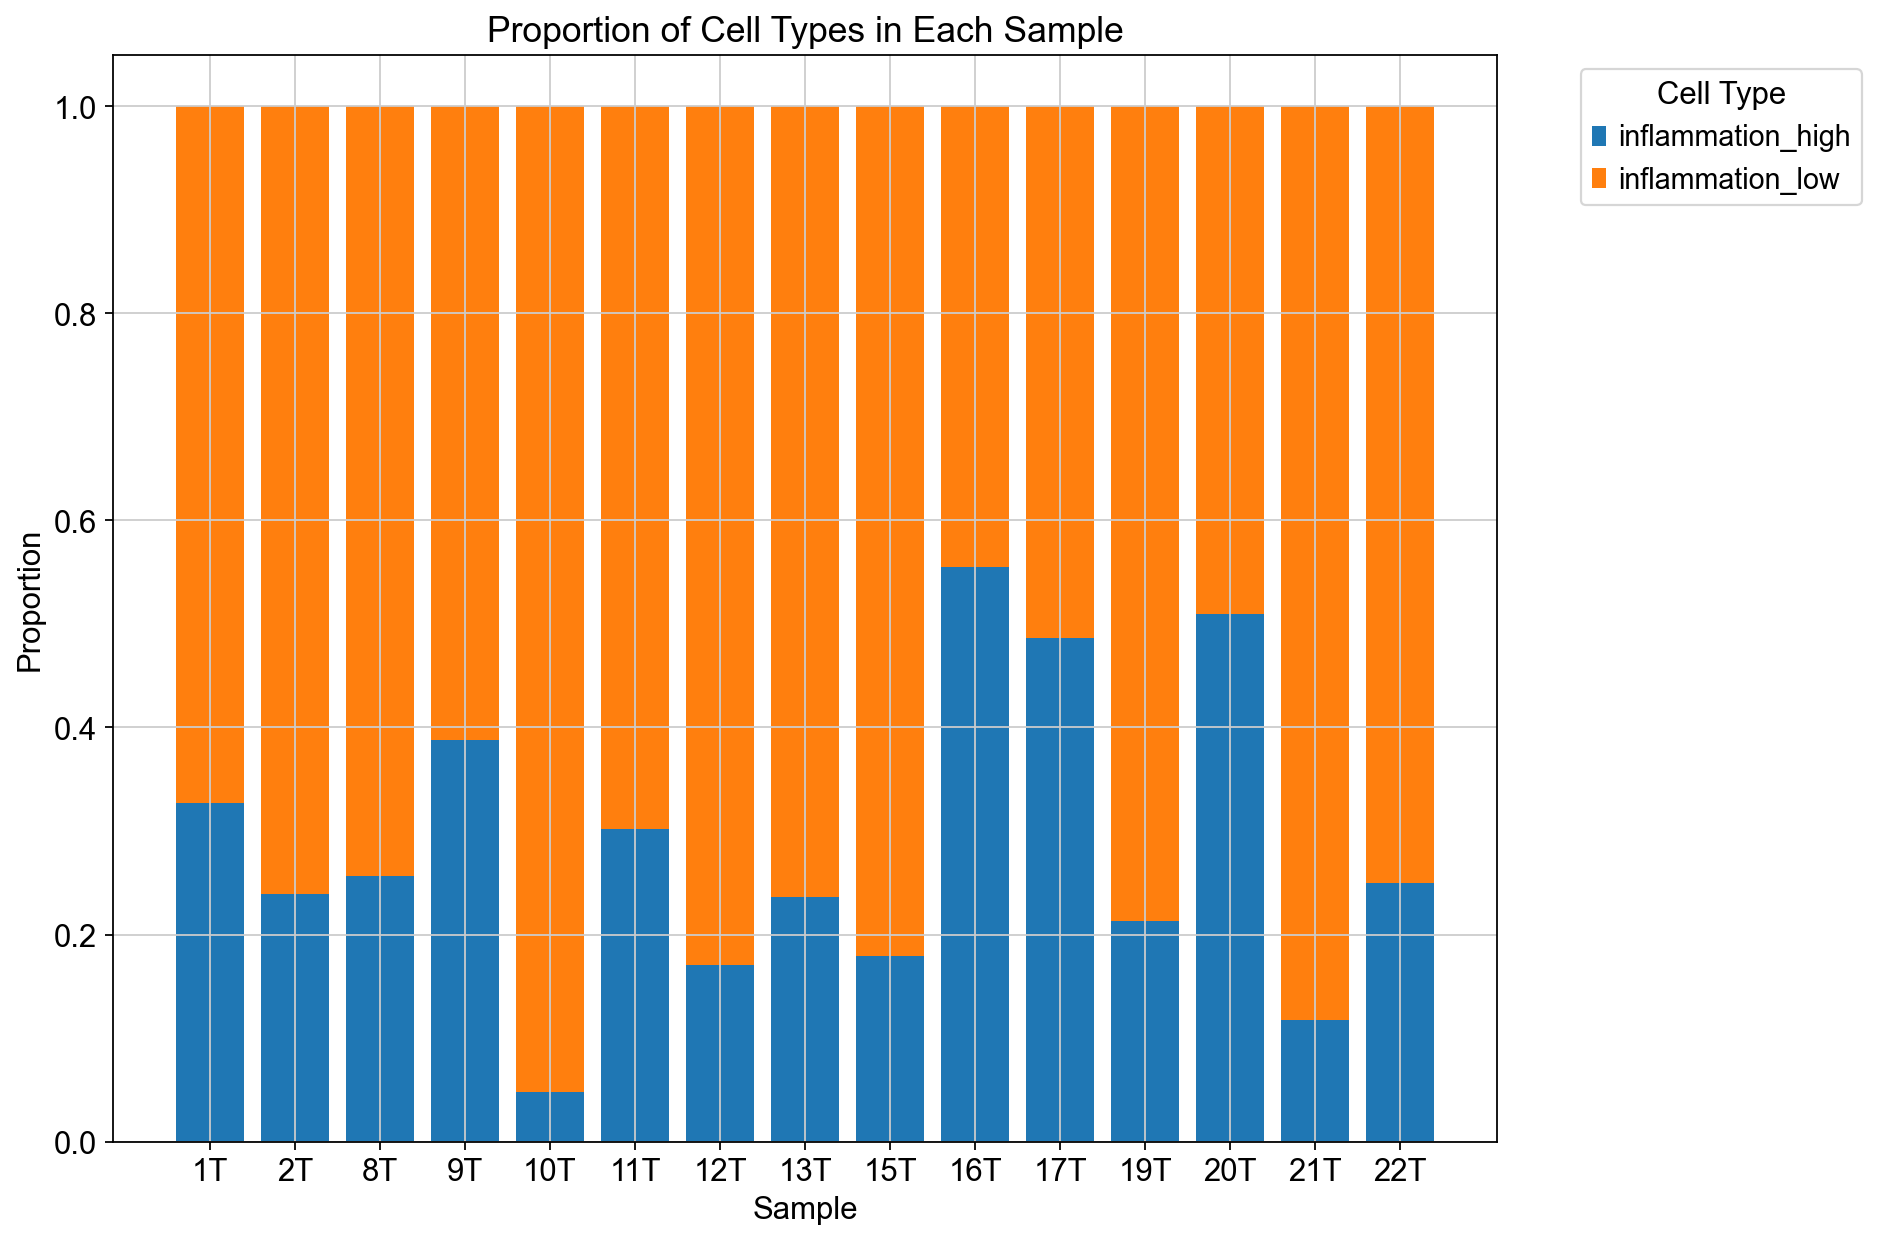

In [83]:
# 1. 计算每个样本中每种细胞类型的数量
cell_type_counts = adata.obs.groupby(['batch', 'inflammation_status']).size().unstack(fill_value=0)

# 2. 计算每个样本的总细胞数Luminal B
sample_totals = cell_type_counts.sum(axis=1)

# 3. 计算每种细胞类型在每个样本中的占比
proportions = cell_type_counts.div(sample_totals, axis=0)

# 4. 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(12, 8))

# 遍历每个细胞类型，逐层堆叠
bottom = np.zeros(len(cell_type_counts.index))  # 初始化底部高度
for cell_type in proportions.columns:
    ax.bar(proportions.index, proportions[cell_type], bottom=bottom, label=cell_type)
    bottom += proportions[cell_type]  # 更新底部高度

# 添加标题和标签
ax.set_title('Proportion of Cell Types in Each Sample', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

#### EMT评分

In [77]:
# 常用 EMT gene sets
epithelial_markers = ['CDH1', 'EPCAM', 'OCLN']
mesenchymal_markers = ['VIM', 'FN1', 'SNAI1', 'SNAI2', 'ZEB1', 'ZEB2', 'TWIST1']

In [78]:
# 计算平均表达（可选对数标准化）
sc.tl.score_genes(adata, epithelial_markers, score_name='epithelial_score')
sc.tl.score_genes(adata, mesenchymal_markers, score_name='mesenchymal_score')

# EMT 综合打分：间质 - 上皮
adata.obs['EMT_score'] = adata.obs['mesenchymal_score'] - adata.obs['epithelial_score']

computing score 'epithelial_score'
    finished: added
    'epithelial_score', score of gene set (adata.obs).
    50 total control genes are used. (0:00:00)
computing score 'mesenchymal_score'
    finished: added
    'mesenchymal_score', score of gene set (adata.obs).
    249 total control genes are used. (0:00:01)


In [79]:
adata.obs['EMT_score']

barcodes
AAACCCAAGACCAAGC-1-1T     0.617162
AAACCCATCACTTTGT-1-1T     0.945356
AAACGAAAGCGGATCA-1-1T    -0.564158
AAACGAACACAGTGTT-1-1T     1.112095
AAACGCTCAAGCAATA-1-1T     0.608037
                            ...   
TTTGGTTGTCCCTACT-1-22T    0.124238
TTTGGTTGTGATGATA-1-22T   -0.257422
TTTGTCAAGGCAAAGA-1-22T    0.157936
TTTGTCAGTCATCCCT-1-22T    0.530073
TTTGTCATCAATCACG-1-22T    0.352824
Name: EMT_score, Length: 27828, dtype: float64

In [80]:
adata.obs['EMT_status'] = np.where(
    adata.obs['EMT_score'] > 0, 'mesenchymal_like', 'epithelial_like'
)

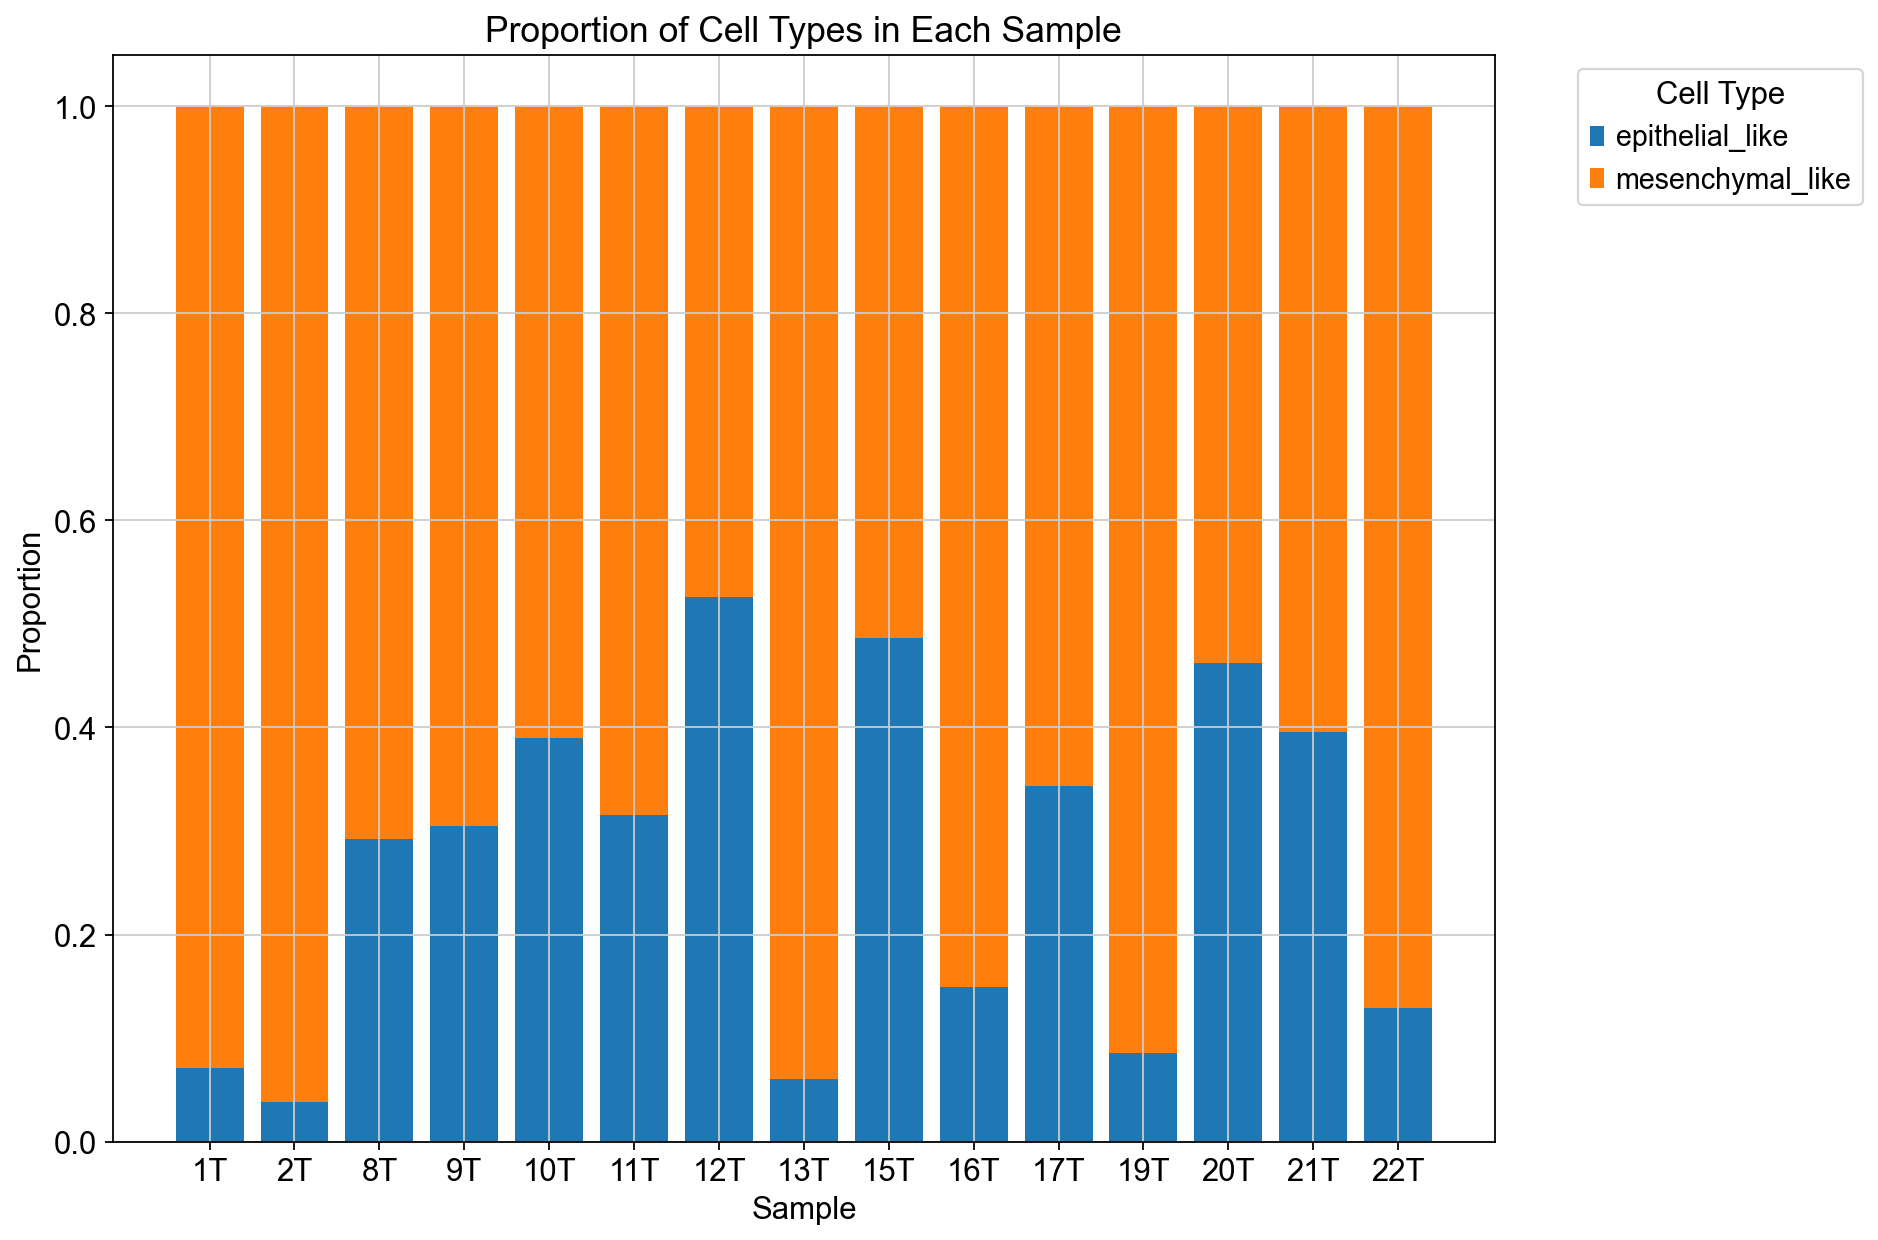

In [81]:
# 1. 计算每个样本中每种细胞类型的数量
cell_type_counts = adata.obs.groupby(['batch', 'EMT_status']).size().unstack(fill_value=0)

# 2. 计算每个样本的总细胞数Luminal B
sample_totals = cell_type_counts.sum(axis=1)

# 3. 计算每种细胞类型在每个样本中的占比
proportions = cell_type_counts.div(sample_totals, axis=0)

# 4. 绘制堆叠条形图
fig, ax = plt.subplots(figsize=(12, 8))

# 遍历每个细胞类型，逐层堆叠
bottom = np.zeros(len(cell_type_counts.index))  # 初始化底部高度
for cell_type in proportions.columns:
    ax.bar(proportions.index, proportions[cell_type], bottom=bottom, label=cell_type)
    bottom += proportions[cell_type]  # 更新底部高度

# 添加标题和标签
ax.set_title('Proportion of Cell Types in Each Sample', fontsize=16)
ax.set_xlabel('Sample', fontsize=14)
ax.set_ylabel('Proportion', fontsize=14)
ax.legend(title='Cell Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

In [85]:
adata.write_h5ad("adata-epi-tumor.h5ad")

#### 差异基因

In [3]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pertpy as pt
import omicverse as ov

In [9]:
adata_epi_highvar = adata[:, adata.var['highly_variable']].copy()  # 总的样本
dds = ov.bulk.pyDEG(adata_epi_highvar.to_df().T) 
dds.drop_duplicates_index() 
better_groups = adata_epi_highvar.obs[adata_epi_highvar.obs['treat']=='After'].index.tolist() # 实验组 
worse_groups = adata_epi_highvar.obs[adata_epi_highvar.obs['treat']=='W/O Treat'].index.tolist() # 对照组 
deg_result = dds.deg_analysis(better_groups, worse_groups, method='ttest')

dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=10)

⚙️ You are using ttest method for differential expression analysis.
⏰ Start to calculate qvalue...
✅ Differential expression analysis completed.
... Fold change threshold: 3.0082578659057617


In [10]:
deg_result_filter = deg_result[deg_result['sig'] != 'normal']
deg_result_filter

,pvalue,qvalue,FoldChange,MaxBaseMean,BaseMean,log2(BaseMean),log2FC,abs(log2FC),size,-log(pvalue),-log(qvalue),sig
KRT5,0.000000,0.000000,15.774076,0.807874,0.429542,-1.219128,3.979484,3.979484,1.577408,inf,10.000000,up
NPY1R,0.000000,0.000000,0.012016,0.956209,0.483847,-1.047378,-6.378950,6.378950,0.001202,inf,10.000000,down
KRT14,0.000000,0.000000,47.830044,1.030408,0.525973,-0.926940,5.579845,5.579845,4.783004,inf,10.000000,up
GFRA1,0.000000,0.000000,0.090976,0.894795,0.488097,-1.034759,-3.458373,3.458373,0.009098,inf,10.000000,down
ECM1,0.000000,0.000000,0.042087,0.839285,0.437301,-1.193300,-4.570497,4.570497,0.004209,inf,10.000000,down
...,...,...,...,...,...,...,...,...,...,...,...,...
KERA,0.000154,0.000252,222.946854,0.001166,0.000583,-10.744555,7.800556,7.800556,22.294685,3.811862,3.598354,up
CSN1S1,0.033701,0.046131,158.513367,0.000827,0.000414,-11.239295,7.308461,7.308461,15.851336,1.472361,1.336004,up
IGKV3D-20,0.028420,0.039201,19.021692,0.000216,0.000111,-13.132703,4.249574,4.249574,1.902169,1.546372,1.406697,up
IGKV1-8,0.000515,0.000815,36.760925,0.000763,0.000389,-11.326221,5.200101,5.200101,3.676093,3.288297,3.088833,up


In [12]:
deg_result_filter.to_excel("epi_deg.xlsx", index=True)

In [ ]:
# After vs Before 差异基因
# 上调（NACT 后 ↑，|log2FC| > 3.2）
up_genes = [
    "PVALB",    # 钙结合蛋白；上皮中出现多为离子稳态/分化指示（需结合空间验证）
    "SCGB1B2P", # Secretoglobin家族假基因转录；腺体/分泌程式线索
    "CPB1",     # 胰腺样胰蛋白水解酶；在上皮出现多反映分泌/消化酶程序激活或混入
    "GRP",      # 胃泌素释放肽；神经内分泌/生长信号，促进增殖与分泌
    "WIF1",     # Wnt抑制因子1；拮抗WNT/β-catenin，趋向分化、弱侵袭
    "NPB",      # 神经肽B；神经内分泌/分泌相关信号
    "PHGR1",    # 上皮分泌/屏障相关蛋白；腺体/分泌表型
    "SERPINA5", # 蛋白酶抑制剂；凝血/纤溶轴调控，影响基质重塑
    "CYP4F8",   # 花生四烯酸代谢；脂质炎症/局部前列腺素代谢
    "NPPC",     # 心钠肽C型；上皮-基质/平滑肌旁分泌互作线索
    "SYT1",     # 突触结合蛋白；囊泡外排/分泌调控
    "ECRG4"     # 上皮候选抑癌基因；分泌因子，抑制增殖/迁移
]

# 下调（NACT 后 ↓，|log2FC| > 3.2；= 治疗前高表达）
down_genes = [
    "KRT1",     # 角蛋白1；角质化/分化表型，下降提示角化程式被抑
    "KRTDAP",   # 角蛋白相关分化蛋白；表皮分化，下降与去角化一致
    "CDHR1",    # 钙依赖黏附蛋白；纤毛/极性相关，下降示上皮极性重塑
    "AL360181.3",# lncRNA/转录本；与特定分化状态相关信号
    "FGFR3",    # 受体酪氨酸激酶；生长/分化信号，下降提示FGFR轴收敛
    "LY6D",     # 上皮-淋巴样谱系标志；下降提示谱系偏移减弱
    "TTYH1",    # 离子通道家族；细胞迁移/体积调控
    "S100A8",   # 炎症/髓系轴信号（上皮中多为应激/混入）；下降→炎症干扰减弱
    "CASC8",    # 长链非编码RNA；与肿瘤表型/调控相关
    "BCL11B",   # 转录因子；在上皮中出现提示谱系/异位表达，下降与上皮化一致
    "IL1R2",    # IL-1诱饵受体；下调提示炎症负反馈轴改变
    "LINC00685" # lncRNA；与组织应激/分化状态相关
]

selected_genes = up_genes + down_genes

In [ ]:
# 新辅助治疗后上调（|log2FC| > 3.0）
up_genes = [
    "DSG1",      # 桥粒蛋白；上皮黏附/屏障，分化增强信号
    "SCGB1B2P",  # 分泌相关假基因/转录本；腔面型/分泌程式线索
    "WIF1",      # Wnt拮抗因子；抑制Wnt/β-catenin，趋向分化、抑增殖
    "TFAP2B",    # AP-2家族转录因子；上皮分化/腔面谱系调控
    "ECRG4",     # 肿瘤相关分泌蛋白；抑癌/炎症调节，常与良性表型相关
    "GRP",       # 胃泌素释放肽；神经内分泌/分泌信号，可能影响增殖通路
    "KRT14",     # 基底样角蛋白；谱系转换/修复表型（与KRT网络联动解读）
    "DSG3",      # 桥粒蛋白；黏附/分化增强
    "STAC2",     # 膜相关适配蛋白；信号转导，可能影响钙通道/分泌
    "POU2AF1",   # B细胞辅助因子（在上皮高表达多为异质/转录背景提示）
]

# 新辅助治疗后下调（|log2FC| > 3.0；即治疗前更高）
down_genes = [
    "NPY1R",     # 神经肽Y受体；促迁移/存活信号，下降提示该轴被压制
    "AGTR1",     # 血管紧张素II受体1；促生长/存活/EMT相关通路，下降利于抑瘤
    "INSYN2A",   # 突触相关样基因；在上皮中多提示信号可塑性/背景转录
    "BMPR1B",    # BMP受体；分化/生长信号分支，方向改变提示发育程式重构
    "DSCAM-AS1", # 雌激素相关lncRNA；与ER通路及迁移相关，下降与治疗后抑制一致
    "RHOXF1P3",  # RHOX家族假基因；ER+乳腺癌相关转录信号，下降提示ER程式弱化
    "KCNE4",     # 钾通道辅亚基；电生理/迁移调控
    "ECM1",     # 细胞外基质蛋白；促侵袭/血管生成，下降提示基质驱动减弱
    "FGFR3",     # 受体酪氨酸激酶；增殖/分化通路，下降提示FGF轴被抑制
    "VSTM2A"   # 分泌蛋白；与侵袭/神经内分泌样特征相关报道
]
selected_genes = up_genes + down_genes

After cleaning: 2331 rows; labeling 20 genes.
🌋 Volcano Plot Analysis:
   Total genes: 2331
   ↗️  Upregulated genes: 310
   ↘️  Downregulated genes: 61
   ➡️  Non-significant genes: 1960
   🎯 Total significant genes: 371
   log2FC range: -8.38 to 12.33
   qvalue range: 1.00e-50 to 9.97e-01

⚙️  Current Function Parameters:
   Data columns: pval_name='qvalue', fc_name='log2FC'
   Thresholds: pval_threshold=0.001, fc_max=1.5, fc_min=-1.5
   Plot size: figsize=(5, 5)
   Gene labels: plot_genes_num=20, plot_genes_fontsize=5
   Custom genes: 20 specified

💡 Parameter Optimization Suggestions:
   ▶ Wide fold change range detected:
     Current: fc_max=1.5, fc_min=-1.5
     Suggested: fc_max=4.0, fc_min=-2.6
   ▶ Small font with many labels:
     Current: plot_genes_fontsize=5, plot_genes_num=20
     Suggested: plot_genes_fontsize=10 or plot_genes_num=10

   📋 Copy-paste ready function call:
   ov.pl.volcano(result, fc_max=4.0, fc_min=-2.6, plot_genes_fontsize=10, plot_genes=['DSG1', 'SCGB1B

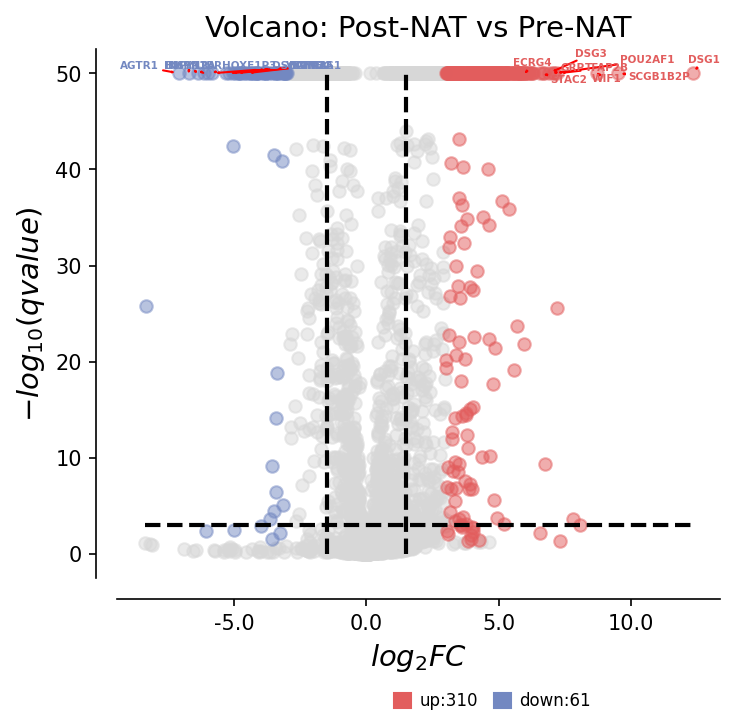

In [15]:
import numpy as np
import pandas as pd

# —— 1) 拷贝并确保基因是索引（若你的基因在第一列而非索引，解除注释下一行）
# deg_result = deg_result.set_index(deg_result.columns[0])

df = deg_result.copy()

# —— 2) 列类型转为数值；把非数字（比如 'nan' 字符串）变成 NaN
for col in ['qvalue', 'log2FC']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# —— 3) 关键：给 qvalue 设置极小正下限，避免 -log10(0) = inf
# 用 float64 能表示的最小正数；也可以改成 1e-300
# eps = np.nextafter(0, 1)
# df['qvalue'] = df['qvalue'].clip(lower=eps)
# 给 qvalue 设下限，保证 -log10(qvalue) ≤ 50
df['qvalue'] = df['qvalue'].clip(lower=10**-50)

# —— 4) 把其余无穷大/无穷小替换成 NaN，再丢弃会影响坐标的行
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna(subset=['qvalue', 'log2FC'])

# # —— 5) 如果还保留了你自己算的 -log 列，也把 inf 压到有限值，避免后续使用时报错
# for col in ['-log(pvalue)', '-log(qvalue)']:
#     if col in df.columns:
#         finite_mask = np.isfinite(df[col])
#         if (~finite_mask).any() and finite_mask.any():
#             df.loc[~finite_mask, col] = df.loc[finite_mask, col].max() + 1

# —— 5) 如果还保留了你自己算的 -log 列，把 inf 压到上限 50
for col in ['-log(pvalue)', '-log(qvalue)']:
    if col in df.columns:
        # 将 inf / -inf 替换为 NaN
        df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
        # 再用 clip 限制最大值为 50
        df[col] = df[col].clip(upper=50)

# —— 6) 只标注“清洗后仍存在且坐标有限”的基因，避免为无效点加注释
plot_genes = []
for g in selected_genes:
    if g in df.index:
        qv = df.at[g, 'qvalue']
        fc = df.at[g, 'log2FC']
        if np.isfinite(qv) and np.isfinite(fc) and (qv > 0):
            plot_genes.append(g)

print(f"After cleaning: {df.shape[0]} rows; labeling {len(plot_genes)} genes.")

# —— 7) 正式绘图：一定要把 result=df（清洗后的表），并传入原始 qvalue
import matplotlib.pyplot as plt
import omicverse as ov

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
grp1, grp2 = 'Post-NAT', 'Pre-NAT'

ov.pl.volcano(
    result=df,
    pval_name='qvalue',      # 传原始 qvalue，函数内部会做 -log10
    fc_name='log2FC',
    pval_max=None,
    FC_max=None,
    figsize=(5, 5),
    title=f'Volcano: {grp1} vs {grp2}',
    titlefont={'weight': 'normal', 'size': 14},
    up_color='#e25d5d',
    down_color='#7388c1',
    normal_color='#d7d7d7',
    up_fontcolor='#e25d5d',
    down_fontcolor='#7388c1',
    normal_fontcolor='#d7d7d7',
    legend_bbox=(0.8, -0.2),
    legend_ncol=2,
    legend_fontsize=8,
    # 阈值
    pval_threshold=0.001,
    fc_max=1.5,               # 注意这里是 fc_max（小写）
    # 标注
    plot_genes=plot_genes,
    plot_genes_num=len(plot_genes),
    plot_genes_fontsize=5,
    ticks_fontsize=8,
    ax=ax
)

plt.tight_layout()
plt.savefig("figures/Epi_After vs WOTreat_DEG.svg", bbox_inches='tight')
plt.show()


#### 通路富集分析

In [4]:
adata = sc.read_h5ad("adata-epi-tumor.h5ad")

In [5]:
sc.tl.rank_genes_groups(adata, groupby = 'treat', method = 'wilcoxon')

/home/hanxue/miniconda3/envs/omicverse/lib/python3.10/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


In [6]:
import gseapy as gp
from gseapy import Msigdb
msig = Msigdb()
gmt = msig.get_gmt(category='mh.all', dbver="2023.2.Hs")
gmt

In [7]:
# get deg result
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
degs = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names','scores', 'pvals','pvals_adj','logfoldchanges']})
degs

,After_names,After_scores,After_pvals,After_pvals_adj,After_logfoldchanges,Before_names,Before_scores,Before_pvals,Before_pvals_adj,Before_logfoldchanges,W/O Treat_names,W/O Treat_scores,W/O Treat_pvals,W/O Treat_pvals_adj,W/O Treat_logfoldchanges
0,CSRP1,53.871223,0.0,0.0,2.499480,RACK1,101.779106,0.0,0.0,1.895177,COX6C,112.542534,0.0,0.0,3.378090
1,SCPEP1,49.971138,0.0,0.0,2.592751,GSTP1,100.786766,0.0,0.0,3.322842,GATA3,110.817322,0.0,0.0,3.144606
2,FBXO32,46.672462,0.0,0.0,2.525043,PERP,89.002029,0.0,0.0,2.563038,GFRA1,109.403854,0.0,0.0,5.389127
3,SELENOM,45.191990,0.0,0.0,1.559949,UBA52,88.612068,0.0,0.0,1.189256,SLC9A3R1,109.403343,0.0,0.0,2.682596
4,SPARCL1,43.543728,0.0,0.0,4.417567,HINT1,88.362152,0.0,0.0,1.804495,MLPH,106.796822,0.0,0.0,3.595254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39730,H2AJ,-40.159363,0.0,0.0,-2.342608,GFRA1,-92.132957,0.0,0.0,-5.646164,EEF1B2,-88.473534,0.0,0.0,-1.654398
39731,KRT19,-41.608662,0.0,0.0,-2.041842,ESR1,-92.815247,0.0,0.0,-4.885666,PERP,-92.314430,0.0,0.0,-2.736145
39732,C4orf48,-41.718922,0.0,0.0,-2.354841,GATA3,-93.601883,0.0,0.0,-2.884397,EEF1A1,-98.001762,0.0,0.0,-1.436914
39733,P4HB,-42.685196,0.0,0.0,-1.405676,MLPH,-95.763252,0.0,0.0,-3.978973,GSTP1,-101.391457,0.0,0.0,-3.749492


In [8]:
# subset up or down regulated genes
degs_sig = degs[degs.After_pvals_adj < 0.05]
degs_up = degs_sig[degs_sig.After_logfoldchanges > 0.5]
degs_dw = degs_sig[degs_sig.After_logfoldchanges < -0.5]

In [9]:
enr_up = gp.enrichr(degs_up.After_names,
                    gene_sets='KEGG_2021_Human',
                    outdir=None)
cc_up = gp.enrichr(degs_up.After_names,
                    gene_sets='GO_Cellular_Component_2023',
                    outdir=None)
bp_up = gp.enrichr(degs_up.After_names,
                    gene_sets='GO_Biological_Process_2023',
                    outdir=None)
mf_up = gp.enrichr(degs_up.After_names,
                    gene_sets='GO_Molecular_Function_2023',
                    outdir=None)
hm_up = gp.enrichr(degs_up.After_names,
                    gene_sets='MSigDB_Hallmark_2020',
                    outdir=None)

SSLError: HTTPSConnectionPool(host='maayanlab.cloud', port=443): Max retries exceeded with url: /Enrichr/datasetStatistics (Caused by SSLError(SSLEOFError(8, '[SSL: UNEXPECTED_EOF_WHILE_READING] EOF occurred in violation of protocol (_ssl.c:1007)')))

In [ ]:
enr_down = gp.enrichr(degs_dw.After_names,
                    gene_sets='KEGG_2021_Human',
                    outdir=None)
cc_down = gp.enrichr(degs_dw.After_names,
                    gene_sets='GO_Cellular_Component_2023',
                    outdir=None)
bp_down = gp.enrichr(degs_dw.After_names,
                    gene_sets='GO_Biological_Process_2023',
                    outdir=None)
mf_down = gp.enrichr(degs_dw.After_names,
                    gene_sets='GO_Molecular_Function_2023',
                    outdir=None)
hm_down = gp.enrichr(degs_dw.After_names,
                    gene_sets='MSigDB_Hallmark_2020',
                    outdir=None)

In [12]:
import re, numpy as np, pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle, PathPatch
from matplotlib.path import Path
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import gseapy as gp

# ---------- helpers ----------
def parse_overlap(s):
    m = re.match(r'^\s*(\d+)\s*/\s*(\d+)\s*$', str(s))
    if not m: return np.nan, np.nan, np.nan
    x, y = int(m.group(1)), int(m.group(2))
    return x, y, (x/y if y else np.nan)

def std_enrich_cols(df):
    cols = {c.lower().replace(' ','').replace('-',''): c for c in df.columns}
    def get(k): return cols.get(k.lower().replace(' ','').replace('-',''), k)
    return df.rename(columns={
        get('Term'):'Term',
        get('Overlap'):'Overlap',
        get('P-value'):'P-value',
        get('Adjusted P-value'):'Adjusted P-value',
        get('Genes'):'Genes',
        get('Combined Score'):'Combined Score'
    })

def topk(df, k=5):
    d = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['Adjusted P-value']).copy()
    d = d.sort_values('Adjusted P-value').head(k).reset_index(drop=True)
    xy = d['Overlap'].map(parse_overlap).apply(pd.Series)
    xy.columns = ['HitCount', 'GeneSetSize', 'GeneRatio']
    d = pd.concat([d, xy], axis=1)
    d['HitCount'] = d['HitCount'].fillna(0).astype(int)
    d['GeneRatio'] = d['GeneRatio'].astype(float)
    d['neglog10P'] = -np.log10(d['P-value'].clip(lower=1e-300))
    d['neglog10Padj'] = -np.log10(d['Adjusted P-value'].clip(lower=1e-300))
    d['Term_clean'] = d['Term'].astype(str)
    return d

def split_genes(s):
    return [x.strip().upper() for x in re.split(r'[;,/]', str(s)) if x.strip()]

def pick_rep_genes(all_genes_in_term, allowed_pool, logfc_map, n=8):
    genes = [g for g in all_genes_in_term if g in allowed_pool]
    genes = sorted(genes, key=lambda g: abs(logfc_map.get(g, 0)), reverse=True)
    return genes[:n]

def spaced_positions(n, top_padding=0.02, bottom_padding=0.02):
    if n <= 1: return [0.5]
    span = 1.0 - top_padding - bottom_padding
    return list(np.linspace(top_padding, top_padding+span, n))

# ---------- main ----------
def plot_sankey_bubble_sns(
    degs_up, degs,
    gene_sets='KEGG_2021_Human',
    TOP_K=8,              # 选取 -log10(Adjusted P-value) 最大的前 K 个通路
    N_REP=8,
    # 气泡大小缩放：作用在 HitCount 上
    BUBBLE_SIZE_SCALE=0.6,
    GENE_COLORMAP='tab20',
    PATH_COLORMAP='Set2',
    svg_path='overlapped_genes.svg',
    figsize=(10,9),
    font_family='Noto Sans CJK SC',
    # Sankey 样式
    EDGE_LW=3.0, EDGE_ALPHA=0.45, CURV=0.35,
    GENE_NODE_W=0.030, GENE_NODE_H=0.020,
    PATH_NODE_W=0.050, PATH_NODE_H=0.028,
    GAP_TEXT2PATH=0.010,
    # 子图间距与贴边控制
    GRID_WSPACE=0.01,          # 两子图基础间距（越小越靠近）
    BUBBLE_SHIFT_LEFT=0.035,   # 再把气泡图整体向左平移（越大越贴近色块）
    # 颜色条细条设置
    CBAR_WIDTH="3%", CBAR_HEIGHT="70%"
):
    # ----- inputs -----
    if 'After_names' not in degs_up.columns:
        raise ValueError("需要 degs_up['After_names'] 作为上调基因列表。")
    if not {'After_names','After_logfoldchanges'} <= set(degs.columns):
        raise ValueError("需要 degs['After_names','After_logfoldchanges']。")

    up_genes = (degs_up['After_names'].astype(str).str.upper().dropna().unique().tolist())
    logfc_map = (degs[['After_names','After_logfoldchanges']]
                 .dropna()
                 .assign(After_names=lambda d: d['After_names'].astype(str).str.upper())
                 .drop_duplicates('After_names')
                 .set_index('After_names')['After_logfoldchanges']
                 .to_dict())

    # ----- enrichment (up only) -----
    enr_up = gp.enrichr(degs_up.After_names, gene_sets=gene_sets, outdir=None)
    res_up = std_enrich_cols(enr_up.results.copy())

    # 计算排序所需统计量
    d = res_up.replace([np.inf, -np.inf], np.nan).dropna(subset=['Adjusted P-value']).copy()
    # 统一解析 overlap、补充列
    xy = d['Overlap'].map(parse_overlap).apply(pd.Series)
    xy.columns = ['HitCount', 'GeneSetSize', 'GeneRatio']
    d = pd.concat([d, xy], axis=1)
    d['HitCount'] = d['HitCount'].fillna(0).astype(int)
    d['GeneRatio'] = d['GeneRatio'].astype(float)
    d['neglog10P'] = -np.log10(d['P-value'].clip(lower=1e-300))
    d['neglog10Padj'] = -np.log10(d['Adjusted P-value'].clip(lower=1e-300))
    d['Term_clean'] = d['Term'].astype(str)

    # **严格按 -log10(Adjusted P-value) 排序并取前 K 个**
    top_up = (d.sort_values(['neglog10Padj', 'neglog10P'], ascending=[False, False])
                .head(int(TOP_K))
                .reset_index(drop=True))

    path_order = top_up['Term_clean'].tolist()

    # 气泡数据（保持与通路顺序一致）
    bub = (top_up.set_index('Term_clean').loc[path_order].reset_index())

    # ----- rep genes & sankey edges -----
    top_up2 = top_up.copy()
    top_up2['RepGenes'] = top_up2['Genes'].apply(split_genes).apply(
        lambda gl: pick_rep_genes(gl, set(up_genes), logfc_map, n=N_REP)
    )
    top_up2 = (top_up2.set_index('Term_clean').loc[path_order].reset_index())

    gene_nodes = sorted(set(g for lst in top_up2['RepGenes'] for g in lst))
    path_nodes = path_order[:]
    edges = [(g, p) for _, r in top_up2.iterrows() for g in r['RepGenes'] for p in [r['Term_clean']]]

    # ----- colors -----
    cmap_gene = mpl.cm.get_cmap(GENE_COLORMAP, max(len(gene_nodes), 1))
    cmap_path = mpl.cm.get_cmap(PATH_COLORMAP, max(len(path_nodes), 1))
    node_color_map = {g: cmap_gene(i) for i, g in enumerate(gene_nodes)}
    node_color_map.update({p: cmap_path(i) for i, p in enumerate(path_nodes)})

    # ----- fixed node positions -----
    y_genes = spaced_positions(len(gene_nodes))
    y_paths = spaced_positions(len(path_nodes))
    x_left, x_right = 0.06, 0.94
    x_block_left = x_right - PATH_NODE_W
    pos_gene = {g: (x_left, y_genes[i]) for i, g in enumerate(gene_nodes)}
    pos_path = {p: (x_block_left, y_paths[i]) for i, p in enumerate(path_nodes)}

    # ----- figure -----
    mpl.rcParams['font.family'] = font_family
    fig = plt.figure(figsize=figsize)
    gs = fig.add_gridspec(ncols=2, nrows=1, width_ratios=[0.68, 0.32], wspace=GRID_WSPACE)
    ax_sankey = fig.add_subplot(gs[0,0])
    ax_bubble = fig.add_subplot(gs[0,1])

    # ===== Left: Sankey =====
    ax_sankey.set_xlim(0, 1)
    ax_sankey.set_ylim(0, 1)
    ax_sankey.axis('off')

    # gene nodes & labels
    for g in gene_nodes:
        x, y = pos_gene[g]
        ax_sankey.add_patch(Rectangle((x, y - GENE_NODE_H/2), GENE_NODE_W, GENE_NODE_H,
                                      facecolor=node_color_map[g],
                                      edgecolor=(0,0,0,0.35), lw=0.6))
        ax_sankey.text(x - 0.012, y, g, va='center', ha='right', fontsize=9)

    # path nodes: 文本在左、色块在右
    for p in path_nodes:
        xb, y = pos_path[p]
        ax_sankey.text(xb - GAP_TEXT2PATH, y, p, va='center', ha='right', fontsize=10)
        ax_sankey.add_patch(Rectangle((xb, y - PATH_NODE_H/2), PATH_NODE_W, PATH_NODE_H,
                                      facecolor=node_color_map[p],
                                      edgecolor=(0,0,0,0.35), lw=0.6))

    # edges (贝塞尔曲线)
    def bezier(x0, y0, x1, y1, curv=CURV):
        cx0, cy0 = x0 + curv*(x1 - x0), y0
        cx1, cy1 = x1 - curv*(x1 - x0), y1
        verts = [(x0, y0), (cx0, cy0), (cx1, cy1), (x1, y1)]
        codes = [Path.MOVETO, Path.CURVE4, Path.CURVE4, Path.CURVE4]
        return Path(verts, codes)
    for (g, p) in edges:
        x0, y0 = pos_gene[g][0] + GENE_NODE_W, pos_gene[g][1]
        x1, y1 = pos_path[p][0], pos_path[p][1]
        ax_sankey.add_patch(PathPatch(bezier(x0, y0, x1, y1),
                                      facecolor='none',
                                      edgecolor=(0.6,0.6,0.6,EDGE_ALPHA),
                                      lw=EDGE_LW, capstyle='round'))

    # ===== Right: Bubble =====
    # X = GeneRatio；颜色 = -log10(Adjusted P-value)；大小 = HitCount
    with sns.axes_style("whitegrid"):
        sizes_px = (bub["HitCount"].fillna(0).astype(float) * (40 * BUBBLE_SIZE_SCALE) + 20)
        sc = ax_bubble.scatter(
            bub["GeneRatio"], bub["Term_clean"],
            s=sizes_px,
            c=bub["neglog10Padj"],       # 用调整后 P 值着色
            cmap="Reds",
            edgecolors="k", linewidths=0.4, alpha=0.9
        )

    # 将右图往左“贴”到色块边上
    pos = ax_bubble.get_position()
    ax_bubble.set_position([pos.x0 - BUBBLE_SHIFT_LEFT, pos.y0, pos.width, pos.height])

    # 隐藏 y 标签与刻度（共用左侧通路名）
    ax_bubble.set_ylabel("")
    ax_bubble.set_yticklabels([])
    ax_bubble.tick_params(axis='y', length=0)

    ax_bubble.set_xlabel("Gene Ratio")
    ax_bubble.grid(True, alpha=0.3, linewidth=0.6)

    # 颜色条（瘦长、在右侧）
    norm = mpl.colors.Normalize(vmin=bub["neglog10Padj"].min(), vmax=bub["neglog10Padj"].max())
    mappable = mpl.cm.ScalarMappable(norm=norm, cmap="Reds")
    cb_ax = inset_axes(ax_bubble, width=CBAR_WIDTH, height=CBAR_HEIGHT, loc="center right",
                       bbox_to_anchor=(0.10, 0., 1, 1), bbox_transform=ax_bubble.transAxes,
                       borderpad=0)
    cbar = plt.colorbar(mappable, cax=cb_ax)
    cbar.set_label("-Log10(Adjusted P-value)")
    cbar.ax.tick_params(labelsize=9)

    plt.tight_layout()
    fig.savefig(svg_path, format="svg", dpi=300)
    plt.close(fig)
    return svg_path


In [13]:
# 假设你已有 degs_up, degs 两个 DataFrame
out = plot_sankey_bubble_sns(
    degs_up, degs,
    gene_sets='MSigDB_Hallmark_2020',
    N_REP=6,
    BUBBLE_SIZE_SCALE=0.1,
    GENE_COLORMAP='tab20',
    PATH_COLORMAP='Set3',
    svg_path='figures/epi-after-upgrades.svg'   # 输出文件名
)

/tmp/ipykernel_3700532/3615563941.py:131: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_gene = mpl.cm.get_cmap(GENE_COLORMAP, max(len(gene_nodes), 1))
/tmp/ipykernel_3700532/3615563941.py:132: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_path = mpl.cm.get_cmap(PATH_COLORMAP, max(len(path_nodes), 1))
/tmp/ipykernel_3700532/3615563941.py:221: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: 

WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	matplotlib.font_manager:font_manager.py:_find_fonts_by_props()- findfont: Font family 'Noto Sans CJK SC' not found.
WARNING	

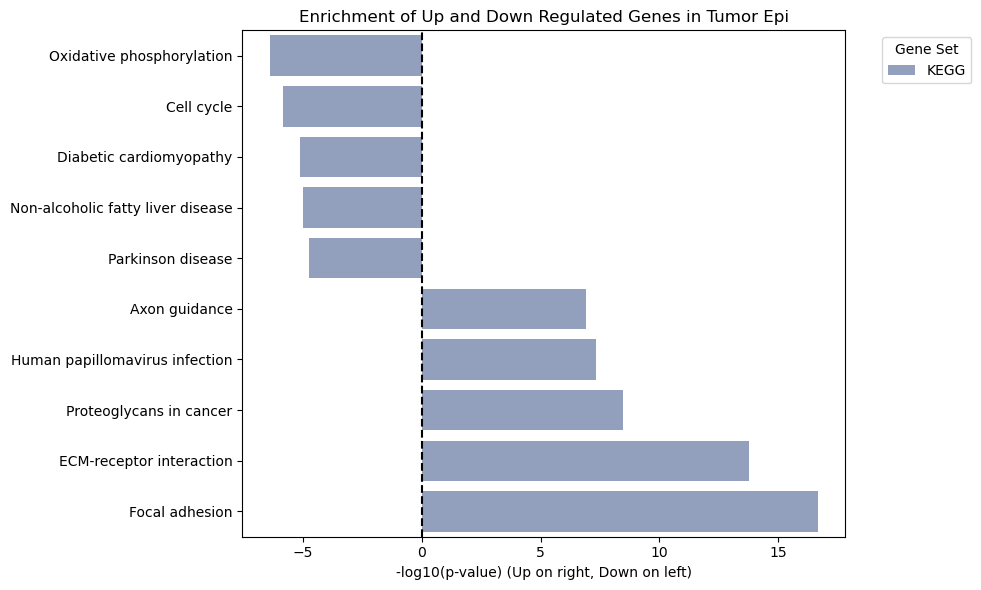

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 拼接所有up和down富集结果
def prepare_df(df, label):
    df = df.copy()
    df['Gene_set'] = label
    return df

# 合并top15条目来自每个数据库
df_up = pd.concat([
    prepare_df(enr_up.res2d.head(5), 'KEGG')
])
df_down = pd.concat([
    prepare_df(enr_down.res2d.head(5), 'KEGG')
])

# 添加方向、统一-log10(pval)
df_up['Direction'] = 'Up'
df_up['logp'] = -np.log10(df_up['P-value'])

df_down['Direction'] = 'Down'
df_down['logp'] = np.log10(df_down['P-value'])  # 注意：下调做正方向方便镜像

# 合并并整理
df_all = pd.concat([df_up, df_down])
df_all['Term'] = df_all['Term'].str.replace('_', ' ')
df_all['Term'] = df_all['Term'].str[:60]  # 避免标签过长

# 设置颜色
palette = {
    'KEGG': '#8b9cc4'
}

# 排序绘图
df_all = df_all.sort_values('logp')
plt.figure(figsize=(10, 6))

# 条形图
sns.barplot(
    data=df_all,
    y='Term',
    x='logp',
    hue='Gene_set',
    palette=palette,
    dodge=False
)

# 设置参考线与图例
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('-log10(p-value) (Up on right, Down on left)')
plt.ylabel('')
plt.title("Enrichment of Up and Down Regulated Genes in Tumor Epi")
plt.legend(title='Gene Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/After_Epi_KEGG_Enrichment_UPvsDOWN.svg")
plt.show()

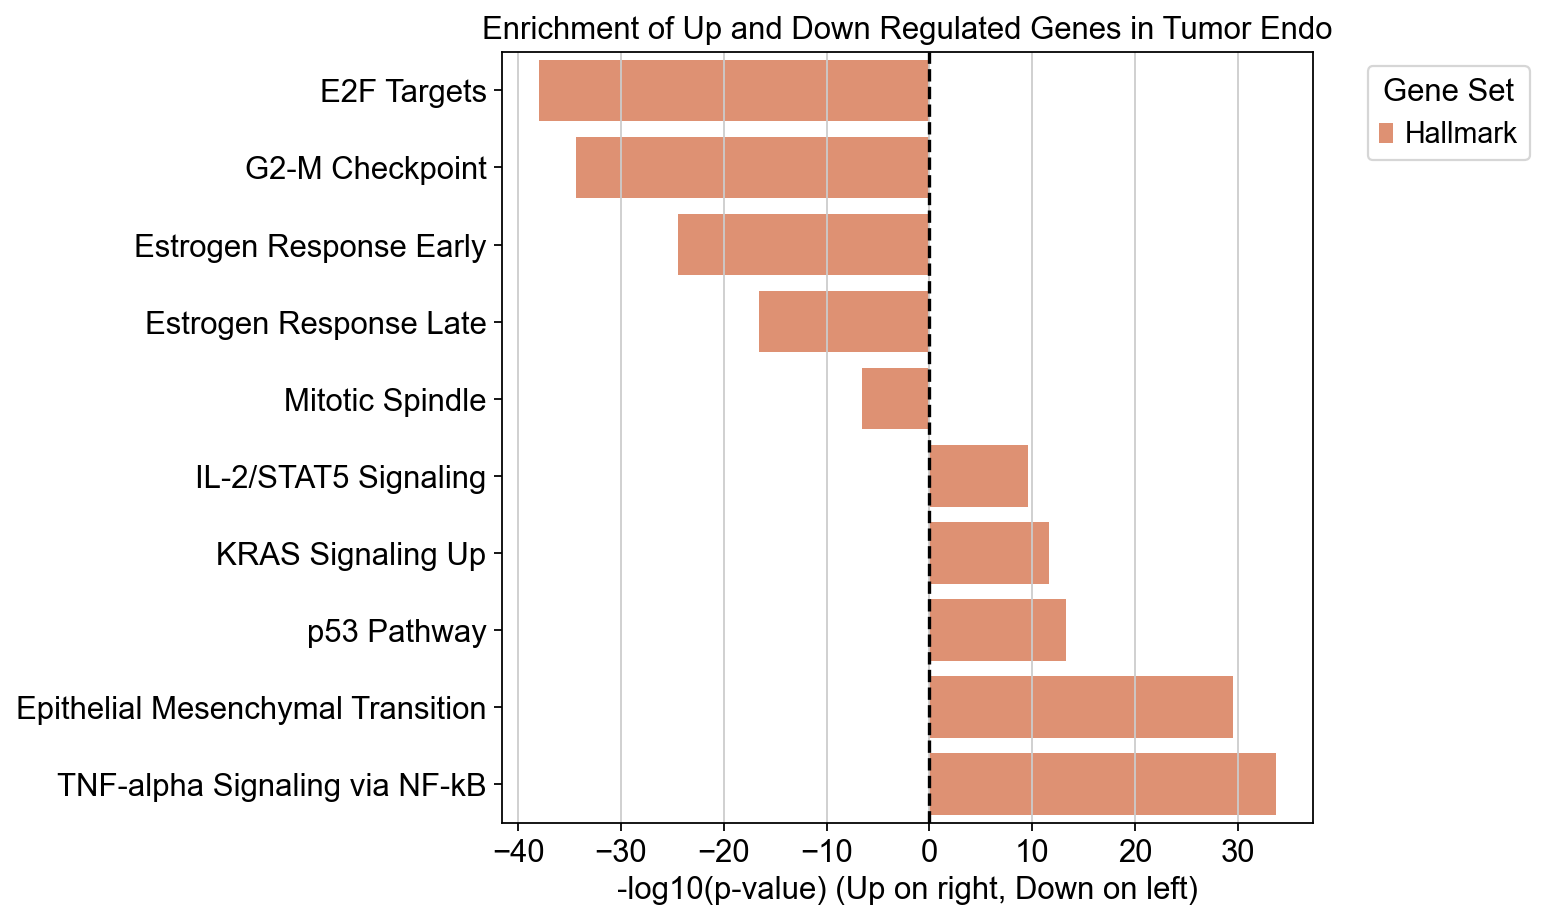

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 拼接所有up和down富集结果
def prepare_df(df, label):
    df = df.copy()
    df['Gene_set'] = label
    return df

# 合并top15条目来自每个数据库
df_up = pd.concat([
    prepare_df(hm_up.res2d.head(5), 'Hallmark')
])
df_down = pd.concat([
    prepare_df(hm_down.res2d.head(5), 'Hallmark')
])

# 添加方向、统一-log10(pval)
df_up['Direction'] = 'Up'
df_up['logp'] = -np.log10(df_up['P-value'])

df_down['Direction'] = 'Down'
df_down['logp'] = np.log10(df_down['P-value'])  # 注意：下调做正方向方便镜像

# 合并并整理
df_all = pd.concat([df_up, df_down])
df_all['Term'] = df_all['Term'].str.replace('_', ' ')
df_all['Term'] = df_all['Term'].str[:60]  # 避免标签过长

# 设置颜色
palette = {
    'Hallmark': '#f08961'
}

# 排序绘图
df_all = df_all.sort_values('logp')
plt.figure(figsize=(10, 6))

# 条形图
sns.barplot(
    data=df_all,
    y='Term',
    x='logp',
    hue='Gene_set',
    palette=palette,
    dodge=False
)

# 设置参考线与图例
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('-log10(p-value) (Up on right, Down on left)')
plt.ylabel('')
plt.title("Enrichment of Up and Down Regulated Genes in Tumor Epi")
plt.legend(title='Gene Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/After_Epi_Hallmark_Enrichment_UPvsDOWN.svg")
plt.show()

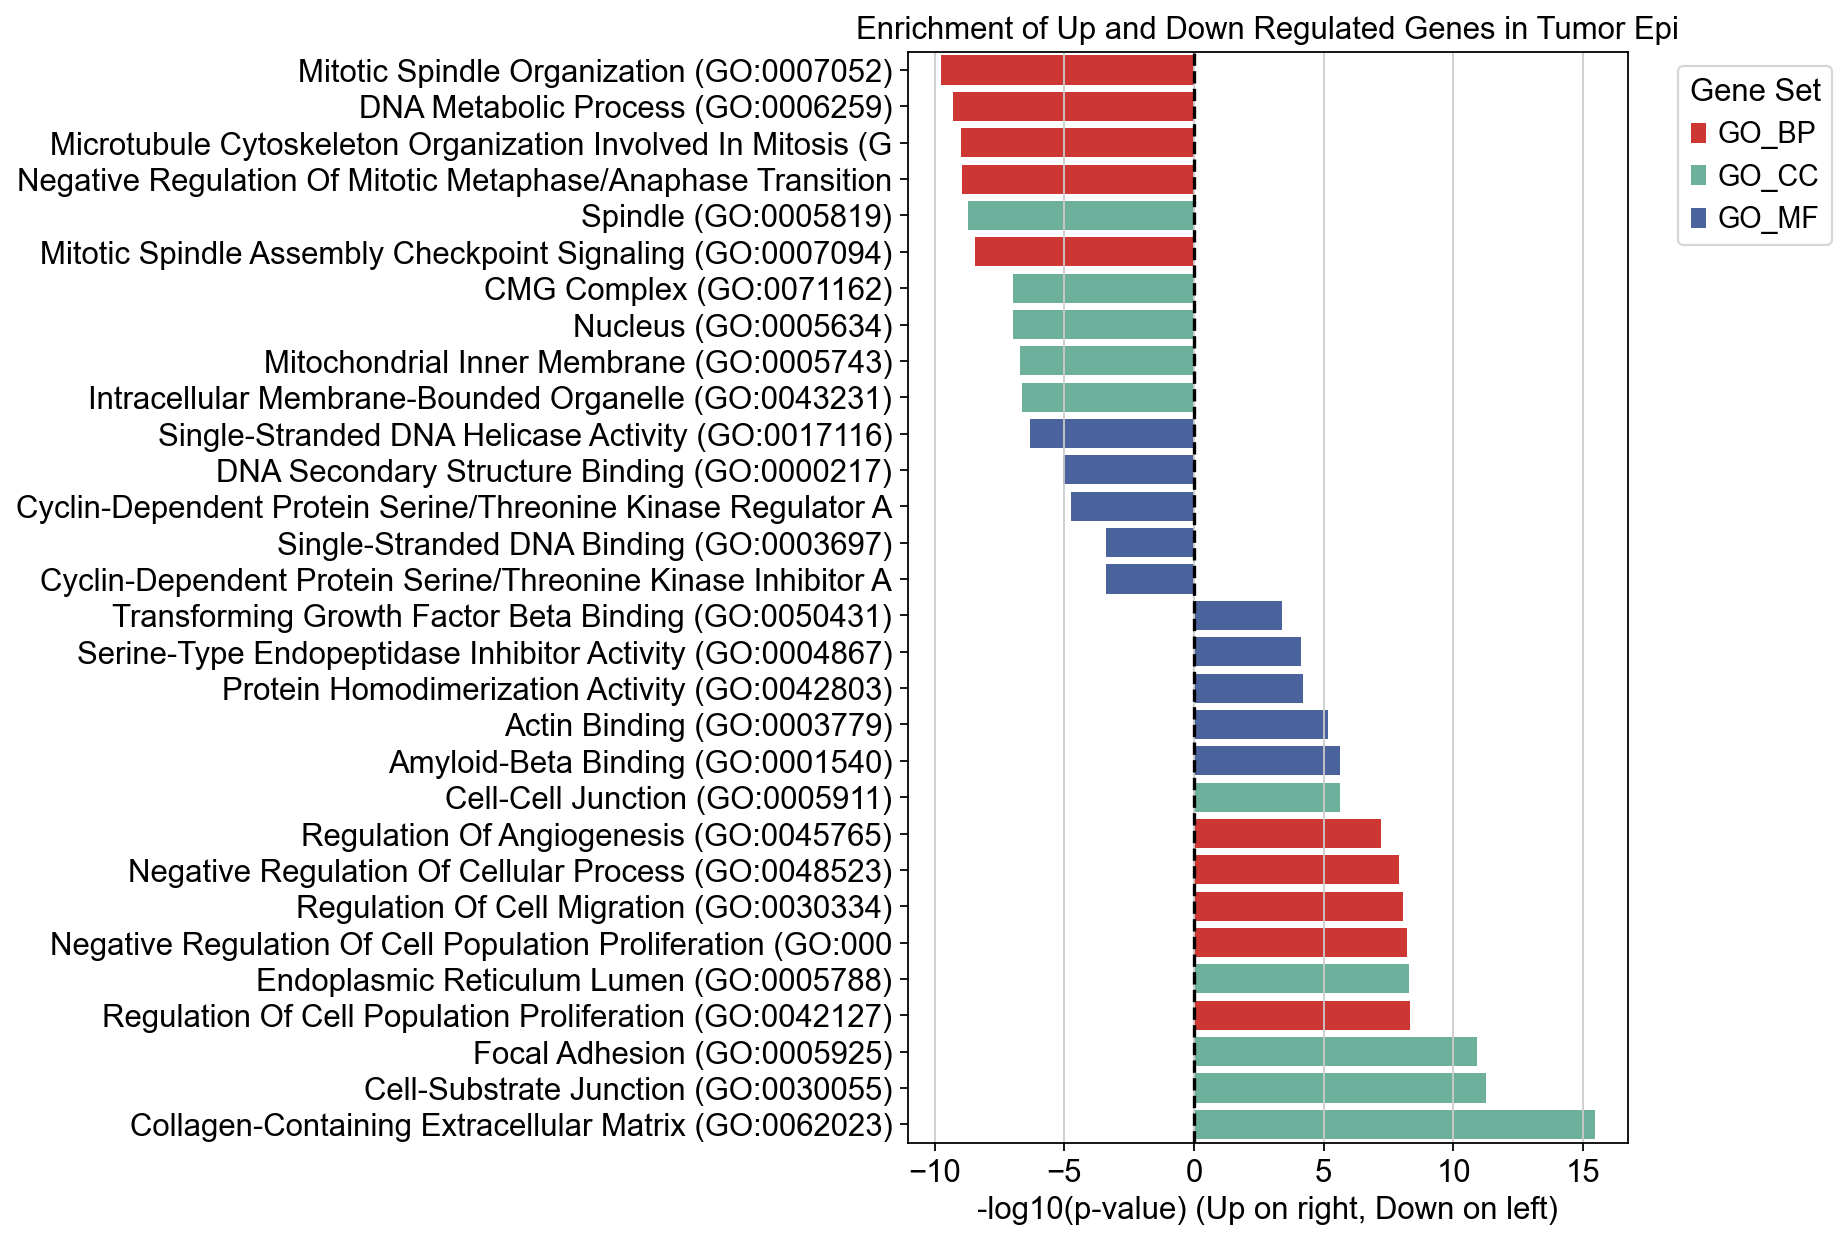

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 拼接所有up和down富集结果
def prepare_df(df, label):
    df = df.copy()
    df['Gene_set'] = label
    return df

# 合并top15条目来自每个数据库
df_up = pd.concat([
    prepare_df(cc_up.res2d.head(5), 'GO_CC'),
    prepare_df(bp_up.res2d.head(5), 'GO_BP'),
    prepare_df(mf_up.res2d.head(5), 'GO_MF')
])
df_down = pd.concat([
    prepare_df(cc_down.res2d.head(5), 'GO_CC'),
    prepare_df(bp_down.res2d.head(5), 'GO_BP'),
    prepare_df(mf_down.res2d.head(5), 'GO_MF')
])

# 添加方向、统一-log10(pval)
df_up['Direction'] = 'Up'
df_up['logp'] = -np.log10(df_up['P-value'])

df_down['Direction'] = 'Down'
df_down['logp'] = np.log10(df_down['P-value'])  # 注意：下调做正方向方便镜像

# 合并并整理
df_all = pd.concat([df_up, df_down])
df_all['Term'] = df_all['Term'].str.replace('_', ' ')
df_all['Term'] = df_all['Term'].str[:60]  # 避免标签过长

# 设置颜色
palette = {
    'GO_CC': '#62bb9f',
    'GO_BP': '#e71f19',
    'GO_MF': '#3d5eaa'
}

# 排序绘图
df_all = df_all.sort_values('logp')
plt.figure(figsize=(12, 8))

# 条形图
sns.barplot(
    data=df_all,
    y='Term',
    x='logp',
    hue='Gene_set',
    palette=palette,
    dodge=False
)

# 设置参考线与图例
plt.axvline(0, color='black', linestyle='--')
plt.xlabel('-log10(p-value) (Up on right, Down on left)')
plt.ylabel('')
plt.title("Enrichment of Up and Down Regulated Genes in Tumor Epi")
plt.legend(title='Gene Set', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("figures/After_Epi_GO_Enrichment_UPvsDOWN.svg")
plt.show()

In [5]:
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 数据中分组信息所在的列名
group_col = 'treat'
adata = sc.read_h5ad("adata-epi-tumor.h5ad")
# adata = adata[adata.obs['treat']=='Before']
import numpy as np

adata.obs['treat_group'] = adata.obs['treat'].map({
    'After': 'Post',
    'Before': 'Pre',
    'W/O Treat': 'Pre'
})

# 1. 定义MP基因集（13个）
MP_gene_sets = {
    'MP1': ['ACTA2','TAGLN','TPM2','MYLK','MYL9','ECRG4','CXCL14','CNN1','MYH11','KRT14','A2M','PPP1R14A','SPARCL1','DKK3','ACTG2','MIR205HG','MATN2','COL17A1','KRT17','POSTN','TP63','TNS4','SNCG','LTBP2','TSHZ2','SPARC','HTRA1','CAV1'],
    'MP2': ['KRT15','KRT23','LTF','CCL28','GABRP','LCN2','SLPI','CRABP1','MMP7','S100A9','SCGB2A2','RARRES1','SAA2','PPP1R1B','NDRG2','KRT14','JUN'],
    'MP3': ['CD74','HLA-DRB1','HLA-DRA','HLA-DPA1'],
    'MP4': ['UBE2C','CENPF','PTTG1','TPX2','MAD2L1','TOP2A','MKI67','TK1','BIRC5','STMN1','MYBL2','TYMS','RRM2','CCNB1','HMGB2','ZWINT','UBE2T','CKS1B','LMNB1','ANP32E','CENPN','ECT2','SMC4'],
    'MP5': ['NEAT1','MACF1','FLNB','PLEC','KCNQ1OT1','FTX','FLNA','JUN','CCNL1','PPP1R15A','TRPS1','RNF213','RRBP1','NORAD','FOSB','LINC00472','TRIB1','MCL1','MTATP6P1','CLK1','EPPK1','CDH1','HSPH1','PRLR','KAT6B','SPTBN1','PARP14','NF1','MIDEAS','ITPR2','VCL','LRIG1','PRKDC','ETNK1','ADAM17','LDLR'],
    'MP6': ['NR4A1','ATF3','FOSB','PPP1R15A','RASD1','BAG3','ZFP36','HSPA6','DUSP1','EGR1','RND1','KLF6','TRIB1','JUN','DNAJB1','BTG2','IER2','FOS','IER5','JUNB','CSRNP1','HSPA1B','MAFF','DNAJB4','GADD45B','ANKRD37','ELF3','HSPA1A','NR4A2'],
    'MP7': ['FOS','EGR1','JUN','IER2','DUSP1','JUNB','FOSB','ZFP36','DNAJB1','GADD45B','HES1','PPP1R15A','CCNL1','RHOB','MYC','HSPA1B'],
    'MP8': ['TFF1','TFF3','DNAJB1','IER2','ZFP36','JUNB','FOS','JUN','CRABP2','HSPA1A'],
    'MP9': ['AGR2','ANKRD30A','TCIM','STC2','TFF1','TFF3','AGR3','SYTL2','PLAT','BATF','AFF3','SCUBE2','ERBB4','AZGP1','FBP1','ESR1','CAPN8','DCDC2','INPP4B','SLC40A1','EFHD1','PREX1','LRP2','MAGED2','DNAJC12','GALNT6','XBP1','MGP','SPDEF'],
    'MP10': ['KRT17','TAGLN','MYL9','MMP7'],
    'MP11': ['MUCL1','PIP','ALDH3B2','SERPINA1','NUDT8'],
    'MP12': ['S100A8','S100A9'],
    'MP13': ['SCGB2A2','SCGB1D2']
}


In [6]:
adata

AnnData object with n_obs × n_vars = 27828 × 39735
    obs: 'batch', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'n_genes', 'n_counts', 'leiden', 'major_type', 'molecular_type', 'leiden_harmony', 'major_type_harmony', 'minor_type', 'minor-type', 'gender', 'doublet_score', 'predicted_doublet', 'leiden-harmony-female', 'majorType-Female', 'epi-subtype', 'treat', 'leiden-1', 'annotation', 'cnv_leiden', 'cnv_score', 'cnv_status', 'epi-type', 'leiden-epi-tumor', 'tumor-type', 'IHC', 'treat_group'
    var: 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'symbol', 'ensg', 'chromosome', 'start', 'end'
    uns: 'annotation_colors', 'batch_colors', 'cnv', 'cnv_neighbors', 'cnv_status_colors', 'dendrogram_annotation', 'dendrogram_leiden', 'dendrogram_leiden-1', 'dendrogram_leiden-epi-tumor', 'epi-subt

In [6]:
# 用于记录无法找到的基因
missing_genes = {}

# 对每个MP打分
for mp_name, genes in MP_gene_sets.items():
    # 过滤掉表达矩阵中不存在的基因
    valid_genes = [g for g in genes if g in adata.var_names]
    if len(valid_genes) < 1:
        print(f"[Warning] {mp_name} 有效基因少于3个，跳过或打分不稳定")
        missing_genes[mp_name] = list(set(genes) - set(valid_genes))
    
    sc.tl.score_genes(adata, gene_list=valid_genes, score_name=f'{mp_name}_score', use_raw=False)

# 可选：打印哪些MP有基因缺失
print("\n以下MP存在未找到的基因：")
for mp, genes in missing_genes.items():
    print(f"{mp}: {genes}")



以下MP存在未找到的基因：


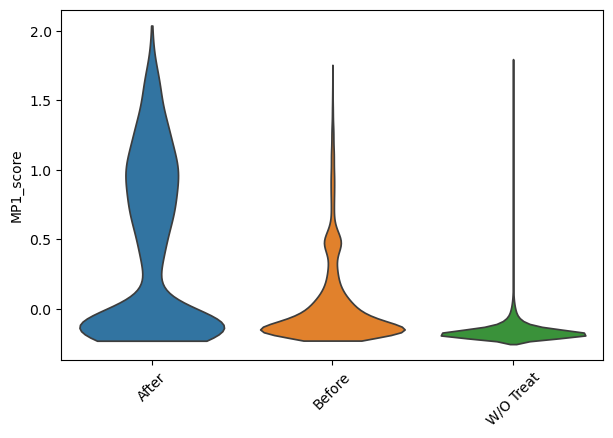

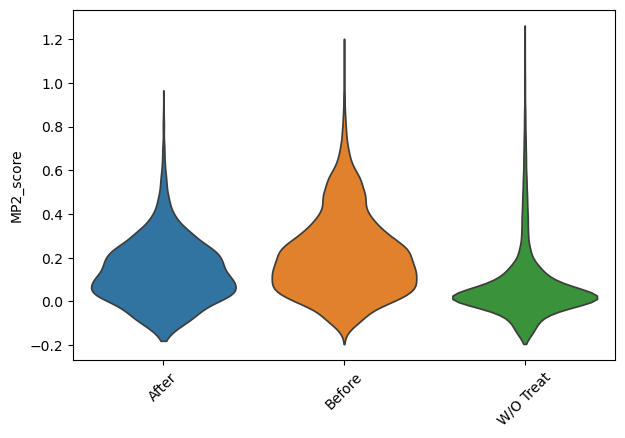

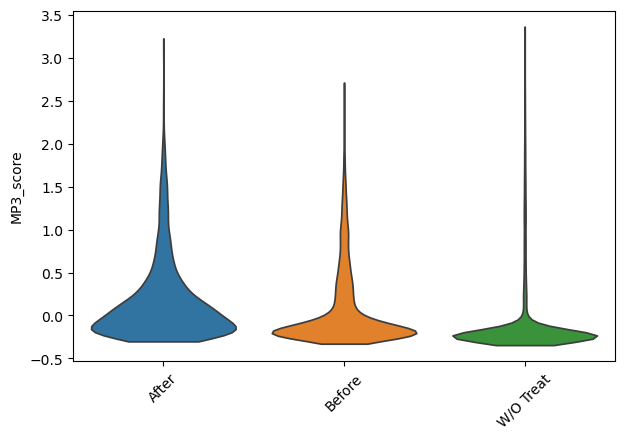

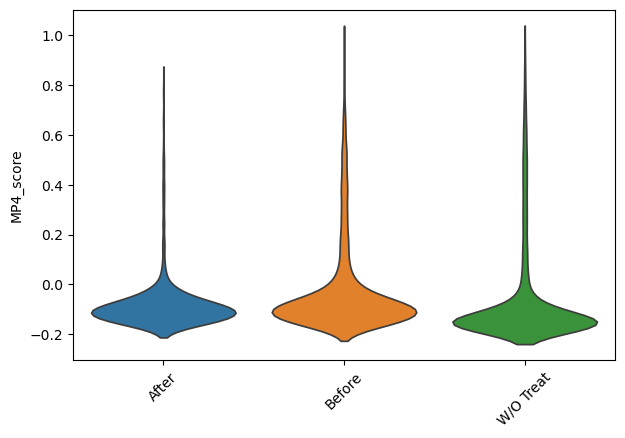

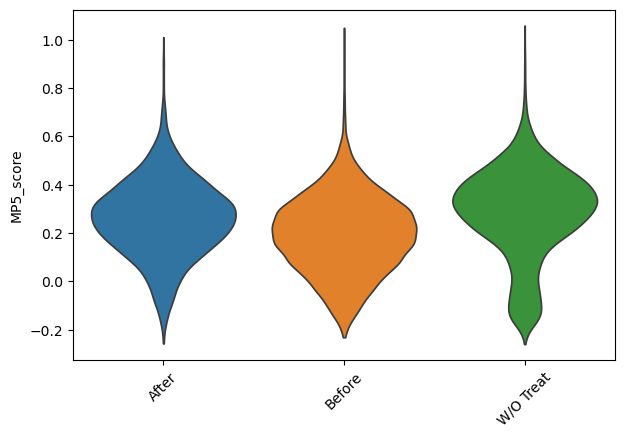

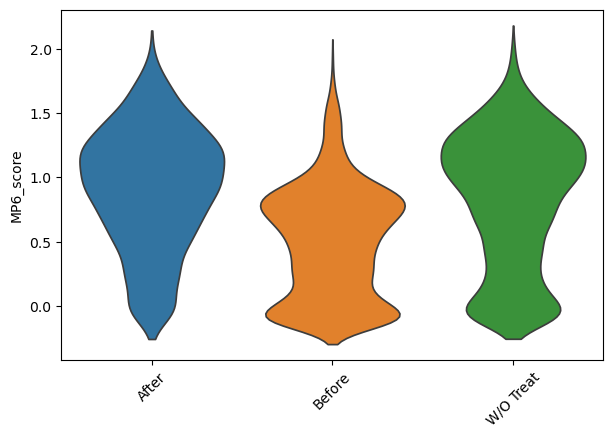

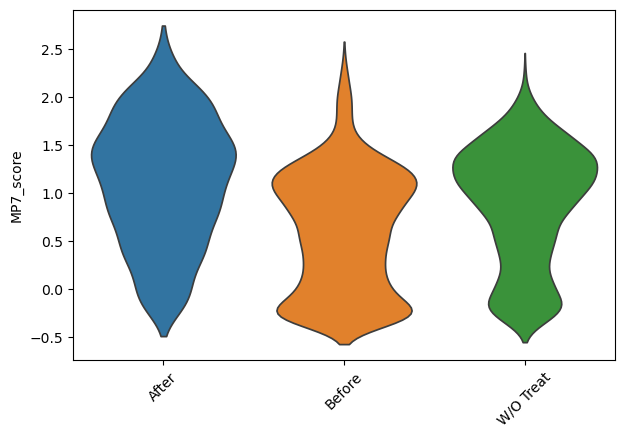

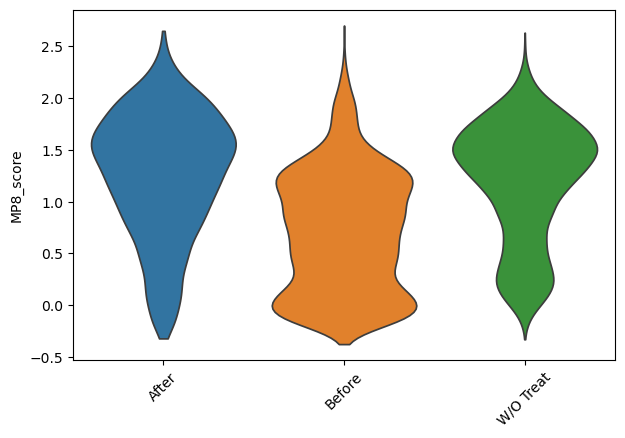

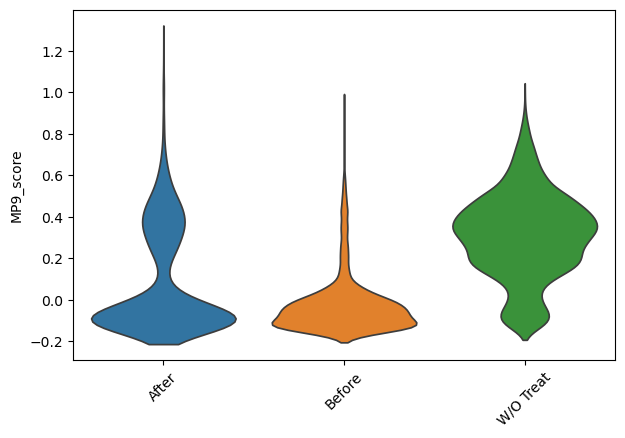

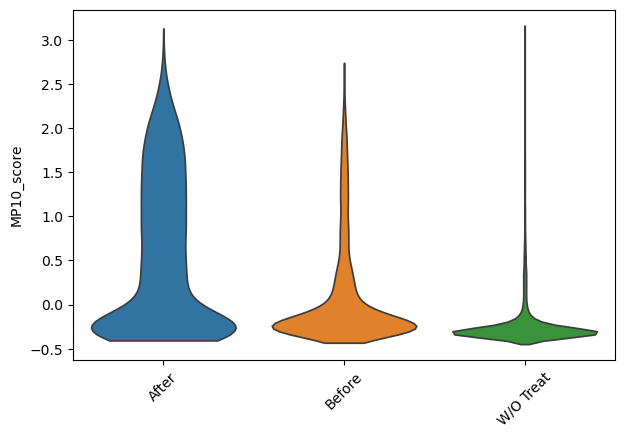

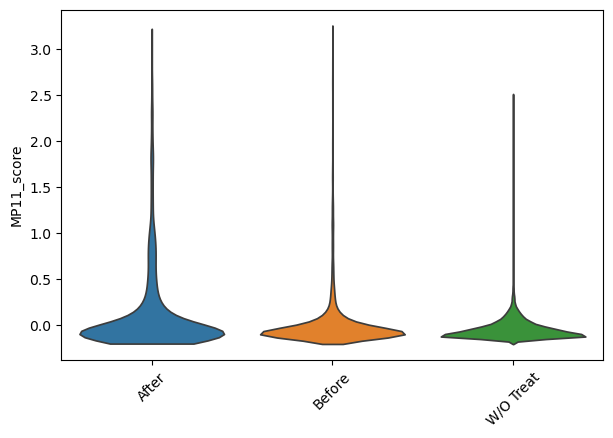

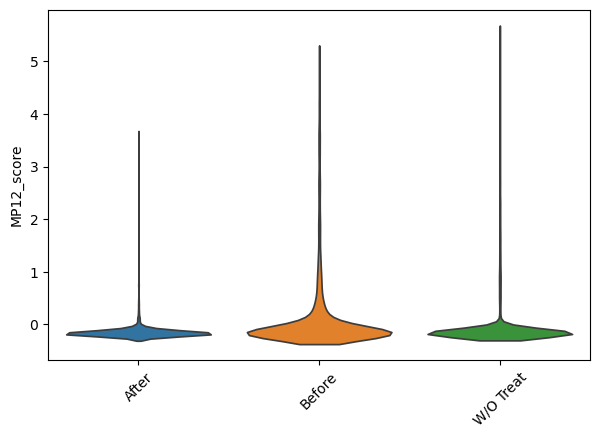

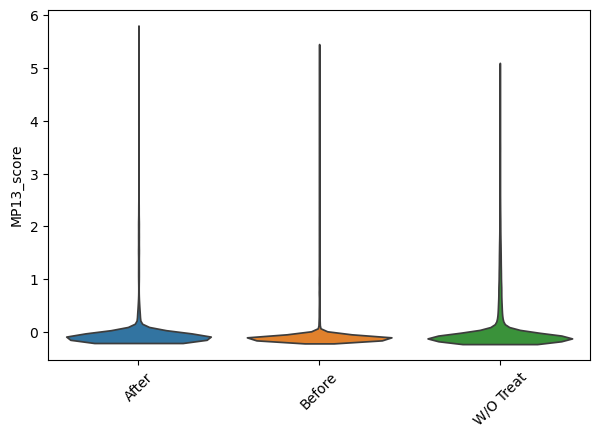

In [7]:
# 所有得分列名
score_cols = [f"{k}_score" for k in MP_gene_sets.keys()]

# 绘图，每个MP一个子图（可改为多子图布局）
for col in score_cols:
    sc.pl.violin(adata, keys=col, groupby=group_col, stripplot=False, rotation=45, size=0.5, show=True)


In [8]:
df_avg = adata.obs.groupby(group_col)[score_cols].mean()
print("\n每组MP平均得分：")
print(df_avg)

# ����Ϊcsv����ѡ��
df_avg.to_csv("MP_scores_groupwise_mean.csv")



每组MP平均得分：
           MP1_score  MP2_score  MP3_score  MP4_score  MP5_score  MP6_score  \
treat                                                                         
After       0.442826   0.134214   0.171116  -0.082826   0.260324   0.910934   
Before      0.034435   0.210190   0.070448  -0.028501   0.193214   0.501767   
W/O Treat  -0.149235   0.070353  -0.094678  -0.062858   0.282621   0.828278   

           MP7_score  MP8_score  MP9_score  MP10_score  MP11_score  \
treat                                                                
After       1.126214   1.259449   0.089767    0.561286    0.120405   
Before      0.607813   0.707969  -0.024643    0.095620    0.016791   
W/O Treat   0.883448   1.195004   0.308441   -0.225729   -0.041532   

           MP12_score  MP13_score  
treat                              
After       -0.144596   -0.017013  
Before       0.103614   -0.071659  
W/O Treat   -0.034819    0.062883  


/tmp/ipykernel_263243/2230272277.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_avg = adata.obs.groupby(group_col)[score_cols].mean()


In [18]:
df_avg = df_avg.rename(columns=lambda x: x.replace("_score", ""))

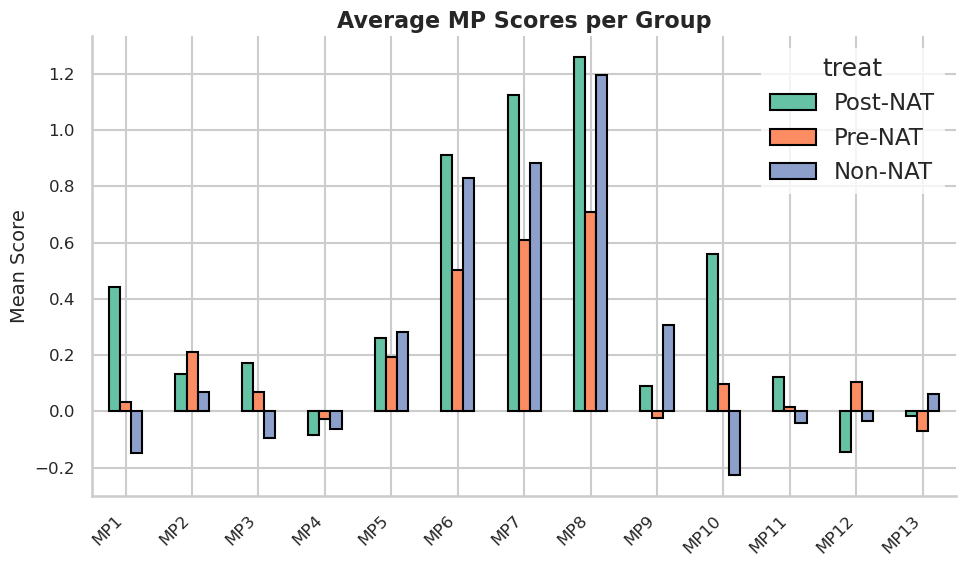

In [ ]:
import matplotlib.pyplot as plt

# 1) 映射行索引（treat）到目标标签（影响 legend）
label_map = {
    "After": "Post-NAT",
    "Before": "Pre-NAT",
    "W/O Treat": "Non-NAT"
}
df_plot = df_avg.rename(index=label_map)  # 注意这里是 index

# 2) 绘图（转置后列=legend）
ax = df_plot.T.plot(kind='bar',
                    figsize=(10, 6),
                    color=plt.cm.Set2.colors,
                    edgecolor='black')

# 3) 标题与坐标轴
plt.title('Average MP Scores per Group', fontsize=16, fontweight='bold')
plt.ylabel('Mean Score', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# 4) 去掉顶部和右侧边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# 5) 美化图例（可选：改标题/位置）
leg = ax.legend(title='treat', frameon=True)
leg.get_frame().set_edgecolor('none')   # 简洁风格

plt.tight_layout()
plt.savefig("figures/MP_scores_total_mean.svg", bbox_inches='tight')
plt.show()


In [7]:
from scipy.stats import mannwhitneyu

for col in score_cols:
    pre = adata.obs.query(f"{group_col} == 'Before'")[col]
    post = adata.obs.query(f"{group_col} == 'After'")[col]
    stat, pval = mannwhitneyu(pre, post)
    print(f"{col}: p = {pval:.3e}")


MP1_score: p = 1.231e-194
MP2_score: p = 3.151e-178
MP3_score: p = 4.333e-10
MP4_score: p = 5.194e-205
MP5_score: p = 7.789e-02
MP6_score: p = 0.000e+00
MP7_score: p = 9.408e-138
MP8_score: p = 0.000e+00
MP9_score: p = 2.370e-158
MP10_score: p = 9.360e-175
MP11_score: p = 1.679e-05
MP12_score: p = 1.176e-45
MP13_score: p = 1.372e-63


In [8]:
from scipy.stats import mannwhitneyu

for col in score_cols:
    pre = adata.obs.query(f"{group_col} == 'W/O Treat'")[col]
    post = adata.obs.query(f"{group_col} == 'After'")[col]
    stat, pval = mannwhitneyu(pre, post)
    print(f"{col}: p = {pval:.3e}")

MP1_score: p = 2.596e-208
MP2_score: p = 5.045e-30
MP3_score: p = 1.645e-132
MP4_score: p = 0.000e+00
MP5_score: p = 3.195e-54
MP6_score: p = 1.482e-04
MP7_score: p = 6.746e-01
MP8_score: p = 1.842e-230
MP9_score: p = 0.000e+00
MP10_score: p = 0.000e+00
MP11_score: p = 1.180e-25
MP12_score: p = 1.094e-18
MP13_score: p = 1.297e-273


/home/hanxue/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/hanxue/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(
/home/hanxue/miniconda3/envs/omicverse/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:461: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, "logfoldchanges"] = np.log2(


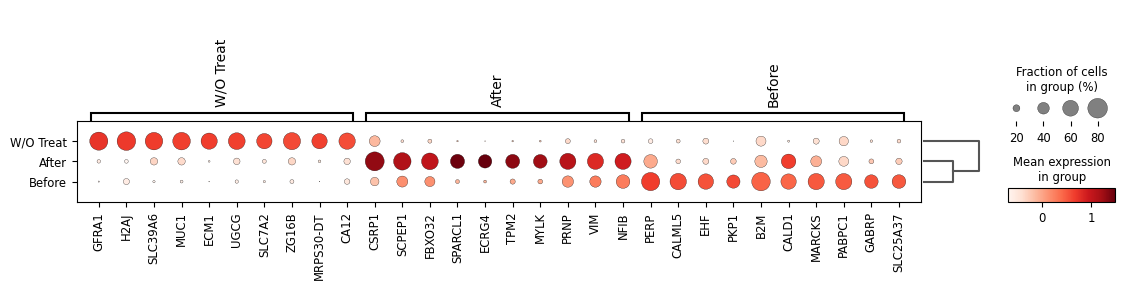

In [9]:
sc.tl.rank_genes_groups(adata, groupby='treat',method='wilcoxon')
sc.tl.dendrogram(adata, groupby='treat')
sc.pl.rank_genes_groups_dotplot(adata, groupby='treat', dendrogram = True, n_genes=10)

findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

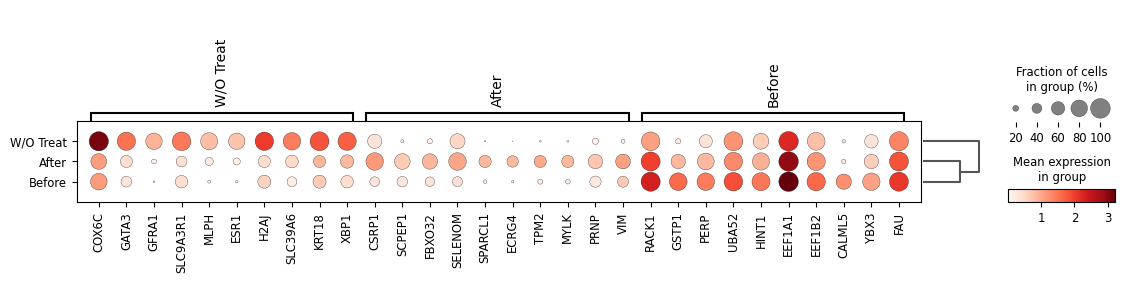

In [21]:
sc.tl.rank_genes_groups(adata, groupby='treat',method='wilcoxon')
sc.tl.dendrogram(adata, groupby='treat')
sc.pl.rank_genes_groups_dotplot(adata, groupby='treat', dendrogram = True, n_genes=10)

/tmp/ipykernel_3700532/2945609320.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs["treat_mapped"] = adata.obs["treat"].replace(mapping)


findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Font family 'Noto Sans CJK SC' not found.
findfont: Fo

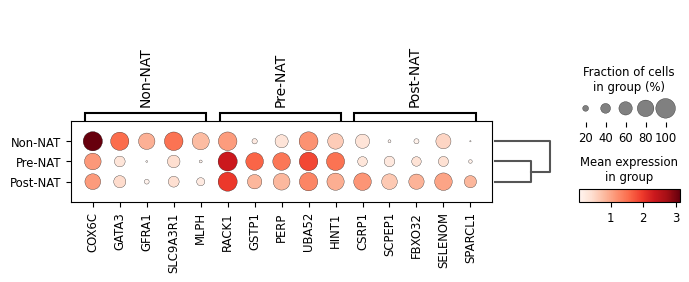

In [19]:
# 1) 建立映射关系
mapping = {
    "After": "Post-NAT",
    "Before": "Pre-NAT",
    "W/O Treat": "Non-NAT",
}

# 2) 生成映射后的分组列（保留未映射值, 如有的话）
adata.obs["treat_mapped"] = adata.obs["treat"].replace(mapping)

# 3) 设定分组顺序（若某些组在数据中不存在会自动跳过）
desired_order = ["Pre-NAT", "Post-NAT", "Non-NAT"]
present = [g for g in desired_order if g in adata.obs["treat_mapped"].unique()]
adata.obs["treat_mapped"] = pd.Categorical(adata.obs["treat_mapped"],
                                           categories=present, ordered=True)

# 4) 按映射后的分组做差异分析与层次聚类
sc.tl.rank_genes_groups(adata, groupby="treat_mapped", method="wilcoxon")
sc.tl.dendrogram(adata, groupby="treat_mapped")

# 5) 绘制 dotplot（带 dendrogram），每组取前 10 个基因
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="treat_mapped",
    dendrogram=True,
    n_genes=5,
    save = '-tumor-total.svg'
)
